In [20]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as skp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

pd.options.display.max_columns = None

from IPython.display import display

# **Preparación del Dataset**
Leer el csv de los datos y bajar el DataFrame.


In [21]:
dir_dataset = 'https://raw.githubusercontent.com/claudia-ramos/7506R-1C2024-GRUPO3/main/Datasets/properati_argentina_2021.csv'
df = pd.read_csv(dir_dataset)

# **Análisis Inicial del Dataset**

Mostramos la cantidad de registros y columnas.



In [22]:
print("Cantidad de filas:", df.shape[0])
print("Cantidad de columnas:", df.shape[1])

Cantidad de filas: 460154
Cantidad de columnas: 20


Mostramos los nombres de las columnas.

In [23]:
df.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

Mostramos los primeros y últimos 3 registros del Dataset.

In [24]:
df.head(3)

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   

   property_surface_covered  property_price property_currency  property_title  
0                     206.0             NaN               NaN  Casa - Capital  
1                     193.0        390000.0               USD   Casa - Malvín  
2                      45.0         47000.0               USD  Casa - Uruguay

In [25]:
df.tail(3)

id  start_date    end_date  created_on  \
460151  E0zwHT18DX8AxhU22hXgng==  2021-01-05  2021-03-01  2021-01-05   
460152  Ec4Tvy/WX5f6RgfaJf2FHQ==  2021-01-05  2021-11-28  2021-01-05   
460153  Y7KBafQ+e5noGh2Pio0xLg==  2021-01-05  9999-12-31  2021-01-05   

          latitud   longitud                  place_l2               place_l3  \
460151        NaN        NaN  Bs.As. G.B.A. Zona Norte     General San Martín   
460152 -33.226234 -60.331848                  Santa Fe     Villa Constitución   
460153 -26.827938 -65.220708                   Tucumán  San Miguel de Tucumán   

       place_l4 place_l5  place_l6 operation    property_type  property_rooms  \
460151      NaN      NaN       NaN     Venta  Local comercial             NaN   
460152      NaN      NaN       NaN  Alquiler  Local comercial             NaN   
460153      NaN      NaN       NaN     Venta  Local comercial             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
460151                NaN                   915.0                     915.0   
460152                NaN                     NaN                      15.0   
460153                NaN                   243.0                     133.0   

        property_price property_currency  \
460151        800000.0               USD   
460152             NaN               NaN   
460153        160000.0               USD   

                                           property_title  
460151  importante edificio comercial en tres plantas ...  
460152                         Local - Villa Constitucion  
460153                      Local - San Miguel De Tucumán

Mostramos una informacion general de los diferentes variables y el tipo de dato.


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

Podemos observar que el Dataset cuenta con 20 columnas:


*   **Id**: Identificador de cada propiedad en el Dataset.
*   **Start_date**: Fecha inicio de la operación.
*   **End_date**: Fecha final de la operación.
*   **Created_on**: Fecha de cración del anuncio en Properati.
*   **Latitud**: Coordenada geográfica de la propiedad.

*   **Longitud**: Coordenada geográfica de la propiedad.

**Observación**:  Observamos que en los campos donde se menciona la ubicación respecto de un lugar, por ejemplo la provincia, municipio o barrio donde se ubica la propiedad; son cinco campos completados por la persona que creó el anuncio de la propiedad donde no necesariamente completó todos los campos. Generalmente cada campo se completa de la siguiente manera:
* **Place_l2**: Provincia donde se ubica la propiedad.
* **Place_l3**: Departamento/comuna/localidad donde se ubica la propiedad.
* **Place_l4**: Zona o barrio donde se ubica la propiedad.
* **Place_l5**: Zona donde se ubica la propiedad.

* **Place_l6**: Sin informacion pero concluimos que por el nombre tambien puede referirse a la zona del lugar donde se ubica la propiedad.

Describimos los campos restantes.

* **Operation**: Tipo de operación.

* **Property_type**: Tipo de propiedad. Puede ser casa,departamento, PH, etc.

*  **Property_rooms**: Cantidad de habitaciones.

*  **Property_bedrooms**: Cantidad de dormitorios.

* **Property_surface_total**: Superficie total en metros cuadrados.
* **Property_surface_covered**: Superficie cubierta total en metros cuadrados.
* **Property_price**: Precio de la propiedad.
* **Property_currency**: Divisa del precio de la propiedad.
* **Property_title**: Titulo del anuncio de la propiedad en Properati.







Cada variable de las diferentes columnas se pueden dividir en:


*   Cuantitativas (numéricas) que pueden ser discretas o continuas.
*   Cualitativas (categorias)  que pueden ser nominales y ordinales.

En nuestro Dataset se clasifican en:


Variables cuantitativas discretas


*  **Property_rooms**
* **Property_bedrooms**

Variables cuantitativas continuas

* **Latitud**
* **Longitud**
* **Property_surface_total**
* **Property_surface_covered**
* **Property_price**

Mostramos las medidas de resumen











In [27]:
variables_cuantitativas = ['latitud', 'longitud','property_rooms','property_bedrooms','property_surface_total','property_surface_covered','property_price']
df[variables_cuantitativas].describe()

latitud       longitud  property_rooms  property_bedrooms  \
count  419740.000000  419740.000000   368498.000000      344113.000000   
mean      -34.228570     -59.557066        3.278053           2.297960   
std         3.251509       2.905129        1.870832           1.673985   
min       -54.832057    -103.219258        1.000000          -3.000000   
25%       -34.640132     -58.899343        2.000000           1.000000   
50%       -34.585122     -58.488309        3.000000           2.000000   
75%       -34.423414     -58.404876        4.000000           3.000000   
max        42.557773     -35.044991       40.000000         390.000000   

       property_surface_total  property_surface_covered  property_price  
count           397813.000000              4.279160e+05    4.421530e+05  
mean               420.601250              9.605005e+03    3.063273e+05  
std               4026.380748              3.440367e+06    4.899613e+06  
min                 -1.000000             -3.000000e+00    0.000000e+00  
25%                 50.000000              4.500000e+01    4.490000e+04  
50%                 90.000000              7.800000e+01    9.800000e+04  
75%                210.000000              1.700000e+02    1.990000e+05  
max             200000.000000              2.147484e+09    1.500000e+09

Variables cualitativas nominales

* **Place_12**
* **Place_13**
* **Place_14**
* **Place_15**
* **Place_16**
* **Property_currency**
* **Property_title**
* **Property_type**
* **Operation**
* **Id**

Mostramos cantidad de valores posibles y frecuencia de cada uno.



In [28]:
frecuencia = df['place_l2'].value_counts()
print("VALORES POSIBLES DE PLACE_L2 ")
print(frecuencia)


VALORES POSIBLES DE PLACE_L2 
place_l2
Capital Federal                 157563
Bs.As. G.B.A. Zona Norte         89693
Santa Fe                         47861
Bs.As. G.B.A. Zona Sur           47754
Bs.As. G.B.A. Zona Oeste         28352
Córdoba                          22528
Buenos Aires Costa Atlántica     12457
Neuquén                           8788
Montevideo                        7494
Buenos Aires Interior             6274
Maldonado                         5540
Mendoza                           5395
Río Negro                         5280
Tucumán                           3571
Colonia                           2535
Salta                             1537
Entre Ríos                        1216
San Juan                           997
La Pampa                           783
Canelones                          744
Chubut                             701
San Luis                           677
Misiones                           529
Florida                            411
Jujuy                    

In [29]:
frecuencia = df['place_l3'].value_counts()
print("VALORES POSIBLES DE PLACE_L3 ")
print(frecuencia)

VALORES POSIBLES DE PLACE_L3 
place_l3
Rosario              34735
Palermo              25811
Tigre                24327
La Plata             20230
Pilar                15648
                     ...  
Saladas                  1
El Chaltén               1
Paso del Sapo            1
Realicó                  1
Carlos Pellegrini        1
Name: count, Length: 767, dtype: int64


In [30]:
frecuencia = df['place_l4'].value_counts()
print("VALORES POSIBLES DE PLACE_L4 ")
print(frecuencia)

VALORES POSIBLES DE PLACE_L4 
place_l4
La Plata                       10253
Nordelta                        8637
Olivos                          3976
Ramos Mejía                     3413
Palermo Hollywood               2967
                               ...  
José C Paz                         1
Del Valle                          1
Barrio Cerrado "Las Marías"        1
Cachoeira do Bom Jesus             1
Juan José Paso                     1
Name: count, Length: 791, dtype: int64


In [31]:
frecuencia = df['place_l5'].value_counts()
print("VALORES POSIBLES DE PLACE_L5 ")
print(frecuencia)

VALORES POSIBLES DE PLACE_L5 
place_l5
BarrioPortezuelo                510
Barrio El Golf                  355
Barrio Los Alisos               314
Barrio Los Lagos                176
Barrio Los Sauces               162
Barrio Los Castores             122
Barrio La Alameda               105
Barrio Cabos del Lago            82
Barrio Lagos del Golf 2          82
Barrio Las Glorietas             77
Barrio Las Caletas               76
Barrio La Isla                   76
Barrio Los Tilos                 72
Islas del Canal                  41
Barrio El Yacht                  40
Barrio Barrancas del Lago        37
QBay Yacht                       31
Enyoi                            27
Barrio Lagos del Golf 1          23
Barrio Residencial Pacheco 2     22
Name: count, dtype: int64


In [32]:
frecuencia = df['place_l6'].value_counts()
print("VALORES POSIBLES DE PLACE_L6 ")
print(frecuencia)

VALORES POSIBLES DE PLACE_L6 
Series([], Name: count, dtype: int64)


In [33]:
frecuencia = df['property_currency'].value_counts()
print("VALORES POSIBLES DE PROPERTY_CURRENCY ")
print(frecuencia)

VALORES POSIBLES DE PROPERTY_CURRENCY 
property_currency
USD    349104
ARS     88869
UYU      3506
PEN        99
COP        12
Name: count, dtype: int64


In [34]:
frecuencia = df['property_type'].value_counts()
print("VALORES POSIBLES DE PROPERTY_TYPE ")
print(frecuencia)

VALORES POSIBLES DE PROPERTY_TYPE 
property_type
Departamento       231358
Casa               120768
Lote                28748
PH                  25910
Local comercial     20546
Oficina             16085
Otro                 7713
Cochera              4111
Depósito             4050
Casa de campo         865
Name: count, dtype: int64


In [35]:
frecuencia = df['operation'].value_counts()
print("VALORES POSIBLES DE OPERATION ")
print(frecuencia)

VALORES POSIBLES DE OPERATION 
operation
Venta                337874
Alquiler              98900
Alquiler temporal     23380
Name: count, dtype: int64


In [36]:
frecuencia = df['property_title'].value_counts()
print("VALORES POSIBLES DE PROPERTY_TITLE ")
print(frecuencia)

VALORES POSIBLES DE PROPERTY_TITLE 
property_title
Departamento - La Plata                                 3102
Departamento - Palermo                                  2858
Departamento - Recoleta                                 2568
Departamento - Centro                                   2293
Departamento - Belgrano                                 1880
                                                        ... 
Casa/PH en venta. Bernal Centro                            1
CASA EN VENTA CON  JARDÍN                                  1
BUENOS AIRES 976 00 03                                     1
CASA INTERNA 2 DORMITORIOS Y GRAN PATIO DORREGO 1100       1
Local - Playa Grande                                       1
Name: count, Length: 253326, dtype: int64


In [37]:
frecuencia = df['id'].value_counts()
print("VALORES POSIBLES DEL ID ")
print(frecuencia)

VALORES POSIBLES DEL ID 
id
XZq2dFGxBiboHY3Bo/tqlw==    1
ohUSBzS62+R9IIndLK6T9A==    1
gWmZT1i6a7JIxPtyUOrZWw==    1
Y3qSNxH0L1Raf4rOoznjlQ==    1
2xAnx852bq1UxRTZJfVNlw==    1
                           ..
BjmANOZWZmWQPijyOY+S8g==    1
W+Iw7blJHHcWkPhvxkViKw==    1
FNKjqwCVd66HqTwxK7Extw==    1
Yenpu3dBfYEZgP0Oi83Cyw==    1
Y7KBafQ+e5noGh2Pio0xLg==    1
Name: count, Length: 460154, dtype: int64


#**Separar train y test antes de hacer imputaciones.**

In [38]:
columnas_modelo = df.columns.tolist()
columnas_modelo.remove('property_price')

df_sin_price = df[columnas_modelo].copy()
df_price = df['property_price'].copy()

df_train, df_test, price_train, price_test = train_test_split(df_sin_price, df_price, test_size=0.3, random_state=2)

#**Preprocesamiento del df del train y Imputacion de datos**

Vemos el porcentaje de valores nulos por columna.

In [39]:
print("Informacion del DF de entrenamiento")
display(df_train.info())

Informacion del DF de entrenamiento
<class 'pandas.core.frame.DataFrame'>
Index: 322107 entries, 127132 to 351400
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        322107 non-null  object 
 1   start_date                322107 non-null  object 
 2   end_date                  322107 non-null  object 
 3   created_on                322107 non-null  object 
 4   latitud                   293869 non-null  float64
 5   longitud                  293869 non-null  float64
 6   place_l2                  322107 non-null  object 
 7   place_l3                  306447 non-null  object 
 8   place_l4                  97621 non-null   object 
 9   place_l5                  1734 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 322107 non-null  object 
 12  property_type             322107 non-null  object 
 13  property

None

In [40]:
print("Porcentaje de valores NaN del DF de entrenamiento")
display(df_train.isna().sum() / df_train.shape[0] * 100)

Porcentaje de valores NaN del DF de entrenamiento


id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       8.766652
longitud                      8.766652
place_l2                      0.000000
place_l3                      4.861738
place_l4                     69.692990
place_l5                     99.461670
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms               19.862344
property_bedrooms            25.215844
property_surface_total       13.543015
property_surface_covered      7.012266
property_currency             4.046171
property_title                0.000000
dtype: float64

Graficos de los datos faltantes de cada columna

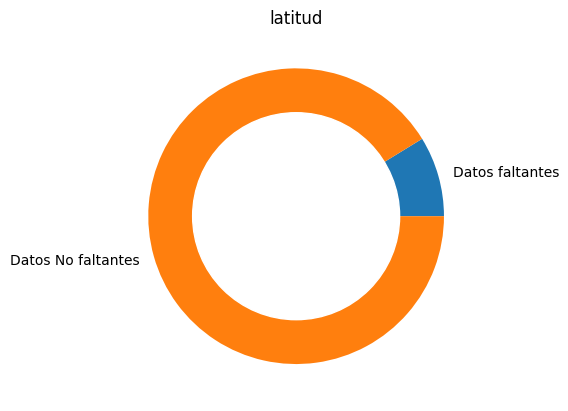

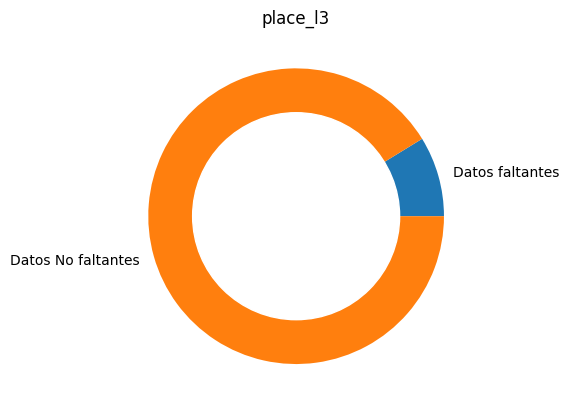

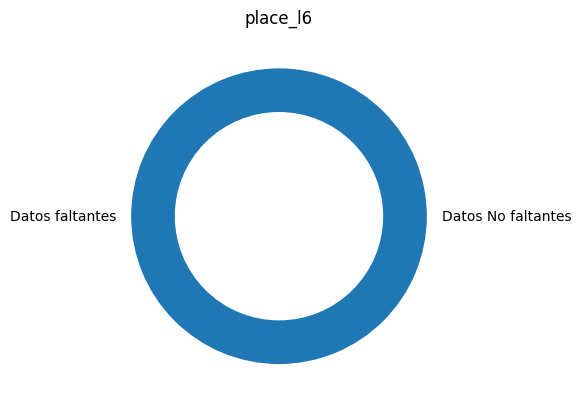

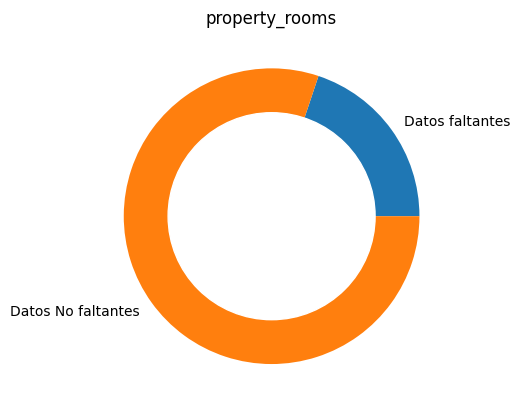

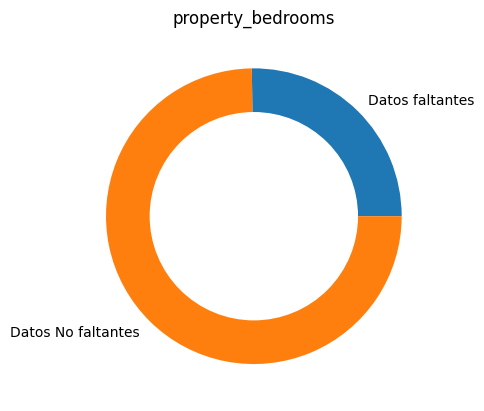

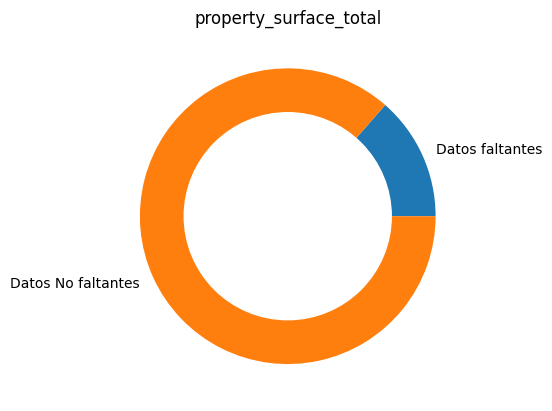

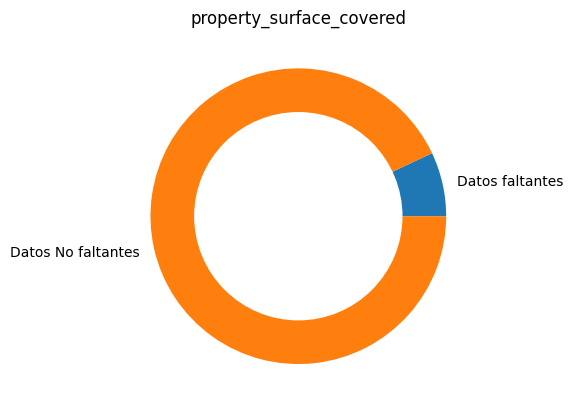

In [41]:
def graficar_datos_faltantes(porcentaje_datos_faltantes, columna):
    names = ['Datos faltantes', 'Datos No faltantes']
    otros = 100 - (porcentaje_datos_faltantes)
    size =  [porcentaje_datos_faltantes, otros]
    my_circle = plt.Circle( (0,0), 0.7, color='white')
    plt.pie(size, labels=names)
    plt.title(columna)
    p = plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()


graficar_datos_faltantes(8.766652, "latitud")
graficar_datos_faltantes(8.766652, "longitud")
graficar_datos_faltantes(8.766652, "place_l3")
graficar_datos_faltantes(69.692990, "place_l4")
graficar_datos_faltantes(99.461670, "place_l5")
graficar_datos_faltantes(100, "place_l6")
graficar_datos_faltantes(19.862344, "property_rooms")
graficar_datos_faltantes(25.215844, "property_bedrooms")
graficar_datos_faltantes(13.543015, "property_surface_total")
graficar_datos_faltantes(7.0122662, "property_surface_covered")
graficar_datos_faltantes(4.046171, "property_currency")


Observar datos faltantes a nivel de fila.

In [42]:
df_filas_con_nan = df_train[df_train.isna().sum(axis=1) >= 1]
porcentaje_datos_faltantes_fila = df_filas_con_nan.shape[0] / df_train.shape[0] * 100
graficar_datos_faltantes(porcentaje_datos_faltantes_fila, "Filas con valores faltantes")


Vemos que en los campos "place_l4", "place_l5" y "place_l6" tienen un porcentaje mayor de valores nulos, por ende no me aporta informacion asi que decidimos directamente eliminar dichos campos del dataset.

In [43]:
columnas_nans_eliminar = ['place_l4', 'place_l5', 'place_l6']
df_train.drop(columnas_nans_eliminar, axis="columns", inplace=True)
df_train.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_currency',
 'property_title']

Los NaN que se encuentran en las columnas que pertenecen a un tipo de dato numerico seran remplazados por su media para imputar dicho dato.

Pero antes de hacer dicha imputacion, vamos a guardar cada serie que se va a imputar para comprarar su distribucion antes y despues de la imputacion

In [44]:
#Guarar las series antes de la imputacion
latitud_antes = df_train['latitud']
longitud_antes = df_train['longitud']
property_rooms_antes = df_train['property_rooms']
property_bedrooms_antes = df_train['property_bedrooms']
property_surface_total_antes = df_train['property_surface_total']
property_surface_covered_antes = df_train['property_surface_covered']

In [45]:
#Calculo de media para cada serie
media_latitud = df_train['latitud'].mean()
media_longitud = df_train['longitud'].mean()
media_property_rooms = df_train['property_rooms'].mean()
media_property_bedrooms = df_train['property_bedrooms'].mean()
media_property_surface_total = df_train['property_surface_total'].mean()
media_property_surface_covered = df_train['property_surface_covered'].mean()

In [46]:
#imputacion de datos por la media
df_train['latitud'].fillna(media_latitud, inplace=True)
df_train['longitud'].fillna(media_longitud, inplace=True)
df_train['property_rooms'].fillna(media_property_rooms, inplace=True)
df_train['property_bedrooms'].fillna(media_property_bedrooms, inplace=True)
df_train['property_surface_total'].fillna(media_property_surface_total, inplace=True)
df_train['property_surface_covered'].fillna(media_property_surface_covered, inplace=True)
df_train.astype("str").eq("nan").sum()

id                              0
start_date                      0
end_date                        0
created_on                      0
latitud                         0
longitud                        0
place_l2                        0
place_l3                    15660
operation                       0
property_type                   0
property_rooms                  0
property_bedrooms               0
property_surface_total          0
property_surface_covered        0
property_currency           13033
property_title                  0
dtype: int64

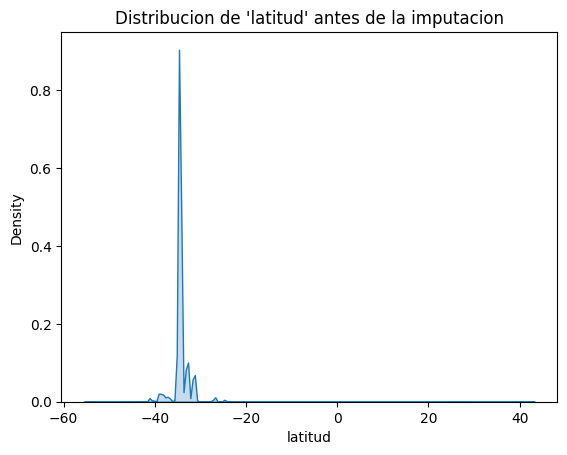

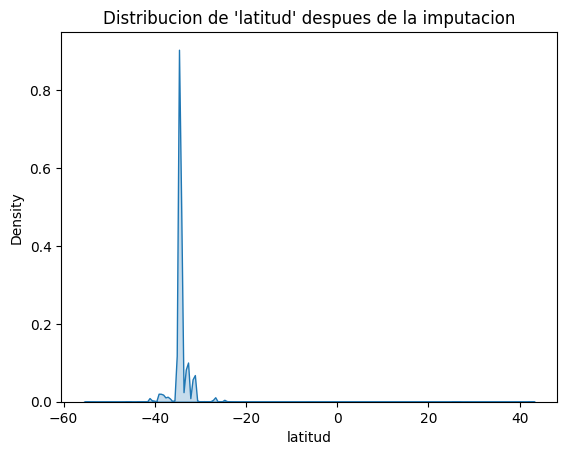

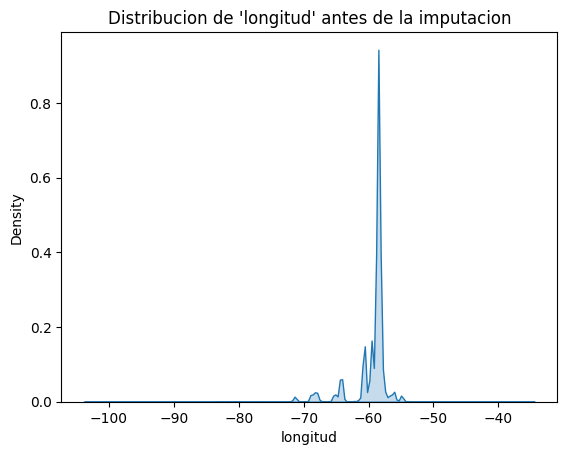

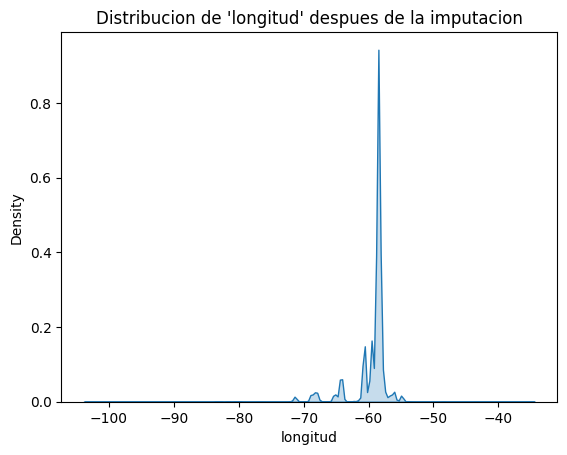

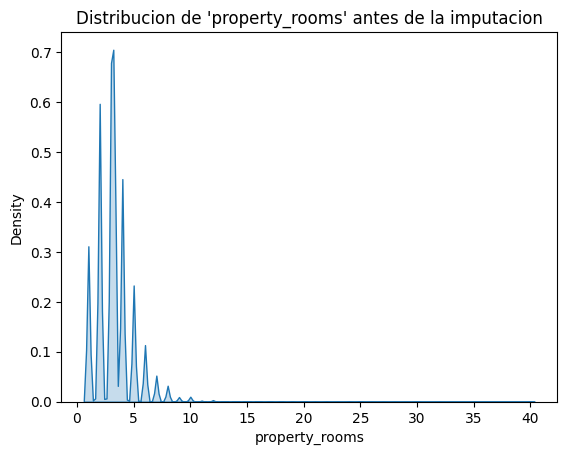

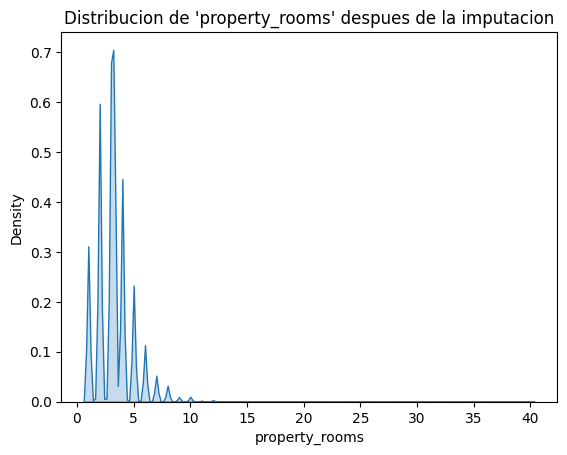

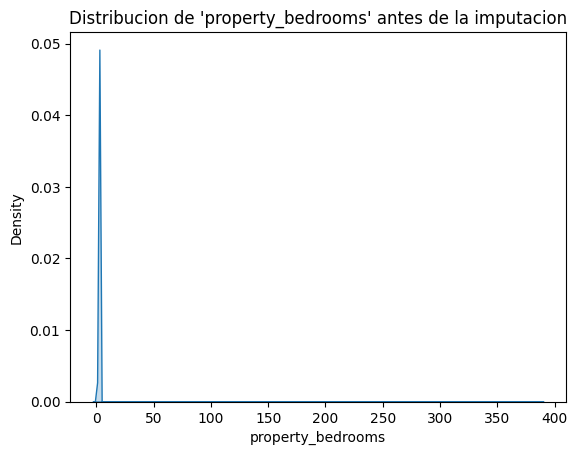

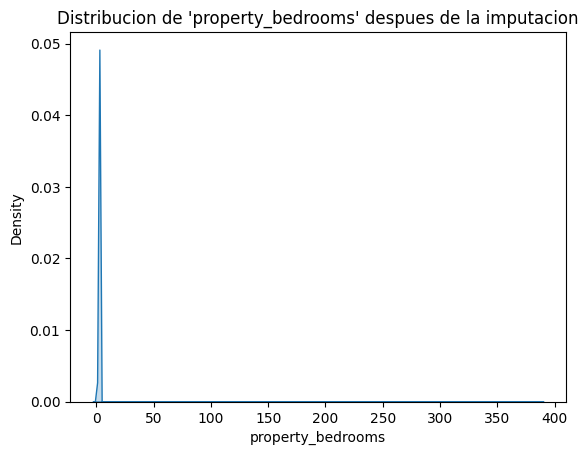

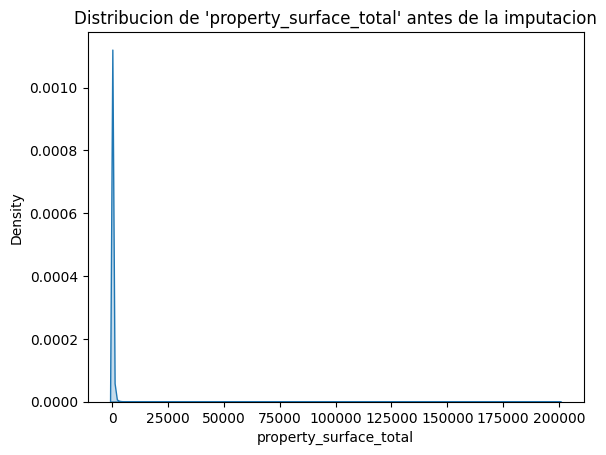

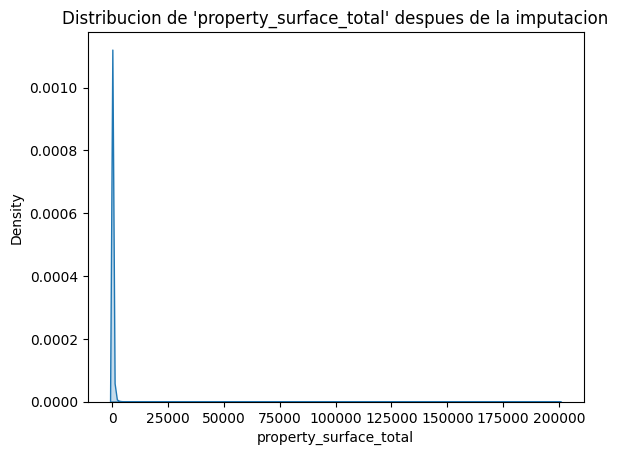

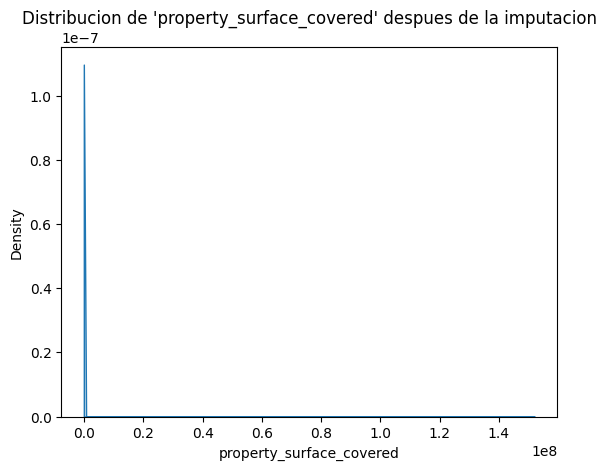

In [48]:
def graficar_distribucion_kdeplot(serie, titulo):
  sns.kdeplot(x=serie, fill=True)
  plt.title(titulo)
  plt.show()

graficar_distribucion_kdeplot(latitud_antes, "Distribucion de 'latitud' antes de la imputacion")
graficar_distribucion_kdeplot(df_train['latitud'], "Distribucion de 'latitud' despues de la imputacion")
graficar_distribucion_kdeplot(longitud_antes, "Distribucion de 'longitud' antes de la imputacion")
graficar_distribucion_kdeplot(df_train['longitud'], "Distribucion de 'longitud' despues de la imputacion")
graficar_distribucion_kdeplot(property_rooms_antes, "Distribucion de 'property_rooms' antes de la imputacion")
graficar_distribucion_kdeplot(df_train['property_rooms'], "Distribucion de 'property_rooms' despues de la imputacion")
graficar_distribucion_kdeplot(property_bedrooms_antes, "Distribucion de 'property_bedrooms' antes de la imputacion")
graficar_distribucion_kdeplot(df_train['property_bedrooms'], "Distribucion de 'property_bedrooms' despues de la imputacion")
graficar_distribucion_kdeplot(property_surface_total_antes, "Distribucion de 'property_surface_total' antes de la imputacion")
graficar_distribucion_kdeplot(df_train['property_surface_total'], "Distribucion de 'property_surface_total' despues de la imputacion")
graficar_distribucion_kdeplot(property_surface_covered_antes, "Distribucion de 'property_surface_covered' antes de la imputacion")
graficar_distribucion_kdeplot(df_train['property_surface_covered'], "Distribucion de 'property_surface_covered' despues de la imputacion")

Se observa que los campos *'place_l3'* (que representa el barrio donde esta ubicado el inmueble del anuncio) y *'property_currency'* (que reprecenta el tipo de moneda en que esta el inmueble) son un tipo de dato no numerico.

Por ende para hacer una imputacion de datos en dichos campos se utilizara la informacion de las demas columnas para prdecir dicho valor NaN.

Para ello se utilizara la tecnica de regrecion logica.

Verificar que los datos esten bien tipeados y que halla una buena calidad de datos.

Ver si hay un dato nulo colocado como "-".

In [49]:
tienen_caracter_nulo_1 = df_train.astype("str").eq("-").any().to_frame("Caracter '-'") #devuelve una serie indicando si la columna tiene un valor "-"
tienen_caracter_nulo_1

Caracter '-'
id                               False
start_date                       False
end_date                         False
created_on                       False
latitud                          False
longitud                         False
place_l2                         False
place_l3                         False
operation                        False
property_type                    False
property_rooms                   False
property_bedrooms                False
property_surface_total           False
property_surface_covered         False
property_currency                False
property_title                   False

Ver si hay un dato nulo colocado como "".

In [50]:
tienen_caracter_nulo_2 = df_train.astype("str").eq("").any().to_frame("Caracter ''") #devuelve una serie indicando si la columna tiene un valor ""
tienen_caracter_nulo_2

Caracter ''
id                              False
start_date                      False
end_date                        False
created_on                      False
latitud                         False
longitud                        False
place_l2                        False
place_l3                        False
operation                       False
property_type                   False
property_rooms                  False
property_bedrooms               False
property_surface_total          False
property_surface_covered        False
property_currency               False
property_title                  False

Ver si hay un dato nulo colocado como "NULL".

In [51]:
tienen_caracter_nulo_3 = df_train.astype("str").eq("NULL").any().to_frame("Caracter 'NULL'") #devuelve una serie indicando si la columna tiene un valor "NULL"
tienen_caracter_nulo_3

Caracter 'NULL'
id                                  False
start_date                          False
end_date                            False
created_on                          False
latitud                             False
longitud                            False
place_l2                            False
place_l3                            False
operation                           False
property_type                       False
property_rooms                      False
property_bedrooms                   False
property_surface_total              False
property_surface_covered            False
property_currency                   False
property_title                      False

Ver si hay un dato nulo colocado como "_".

In [52]:
tienen_caracter_nulo_4 = df_train.astype("str").eq("_").any().to_frame("Caracter '_'") #devuelve una serie indicando si la columna tiene un valor "_"
tienen_caracter_nulo_4

Caracter '_'
id                               False
start_date                       False
end_date                         False
created_on                       False
latitud                          False
longitud                         False
place_l2                         False
place_l3                         False
operation                        False
property_type                    False
property_rooms                   False
property_bedrooms                False
property_surface_total           False
property_surface_covered         False
property_currency                False
property_title                   False

Ver si hay un dato nulo colocado como "?".

In [53]:
tienen_caracter_nulo_6 = df_train.astype("str").eq("?").any().to_frame("Caracter '?'") #devuelve una serie indicando si la columna tiene un valor "?"
tienen_caracter_nulo_6

Caracter '?'
id                               False
start_date                       False
end_date                         False
created_on                       False
latitud                          False
longitud                         False
place_l2                         False
place_l3                         False
operation                        False
property_type                    False
property_rooms                   False
property_bedrooms                False
property_surface_total           False
property_surface_covered         False
property_currency                False
property_title                   False

Eliminar filas duplicadas.

In [54]:
df_train = df_train.drop_duplicates()

Verificamos los valores numericos que tengan sentido. Para ello filtramos un df con todas las columnas con un tipo de dato numerico.

In [55]:
df_train_num = df_train.select_dtypes(include=['float64'])
df_train_num.dtypes

latitud                     float64
longitud                    float64
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
dtype: object

Sabemos que:

* **property_rooms** Representa la cantidad de ***ambientes del inmueble***, por ende no tiene sentido que tengo un valor menor o igual a 0 y ademas el valor tiene que ser un entero.
* **property_bedrooms** Representa la cantidad de ***dormitorios del inmueble***, por ende no tiene sentido que tengo un valor menor o igual a 0 y ademas el valor tiene que ser un entero.          
* **property_surface_total** Representa la ***superficie total del inmueble***, por ende no tiene sentido que tengo un valor menor o igual a 0.     
* **property_surface_covered** Representa la ***superficie cubierta del inmueble***, por ende no tiene sentido que tengo un valor menor o igual a 0.    
* **property_price** Representa la ***el precio del inmueble***, por ende no tiene sentido que tengo un valor menor o igual a 0.


Convertir las columnas que me indican el numero de habitaciones y de ambientes a un tipo de dato entero.

In [56]:
df_train['property_rooms'] = df_train['property_rooms'].astype(int)
df_train['property_bedrooms'] = df_train['property_bedrooms'].astype(int)


In [57]:
display((df_train[['property_rooms']] <= 0).any().to_frame("Ambientes del inmueble <= 0?"))
display((df_train[['property_bedrooms']] <= 0).any().to_frame("Dormitorios del inmueble <= 0?"))
display((df_train[['property_surface_total']] <= 0).any().to_frame("Superficie total del inmueble <= 0?"))
display((df_train[['property_surface_covered']] <= 0).any().to_frame("Superficie cubierta del inmueble <= 0?"))

Ambientes del inmueble <= 0?
property_rooms                         False

Dormitorios del inmueble <= 0?
property_bedrooms                            True

Superficie total del inmueble <= 0?
property_surface_total                                 True

Superficie cubierta del inmueble <= 0?
property_surface_covered                                    True

Vemos que hay anuncios que tienen dormitorios, superfucies totales y superficie cubierta menores o iguales a 0.

Son valores que no tienen sentido por ende hay que tomarlos como datos nulos (datos faltantes) y hay que completar dichos campos.

In [58]:
df_dormitorios_null = df_train[df_train['property_bedrooms'] <= 0]
print("Cantiad de anuncios con el valor de dormitorio sin sentido:")
display(df_dormitorios_null.shape[0])

df_surface_total_null = df_train[df_train['property_surface_total'] <= 0]
print("Cantiad de anuncios con el valor de la superficie total sin sentido:")
display(df_surface_total_null.shape[0])

df_surface_covered_null = df_train[df_train['property_surface_covered'] <= 0]
print("Cantiad de anuncios con el valor de la superficie de la cubierta sin sentido:")
display(df_surface_covered_null.shape[0])

Cantiad de anuncios con el valor de dormitorio sin sentido:


4

Cantiad de anuncios con el valor de la superficie total sin sentido:


2

Cantiad de anuncios con el valor de la superficie de la cubierta sin sentido:


2

A los anuncios con el valor de dormitorio sin sentido se les va a sustituir el valor con el numero de ambientes menos 1. Y a los de anuncios con el valor de la superficie total y cubierta sin sentido se les va a sustituir por la media

In [59]:
for x in range(df_dormitorios_null.shape[0]):
    index = df_dormitorios_null.index[x]
    df_train.loc[index, 'property_bedrooms'] = df_train.loc[index, 'property_rooms']-1
    print(df_train.loc[index, 'property_bedrooms'])

for x in range(df_surface_total_null.shape[0]):
    index = df_surface_total_null.index[x]
    df_train.loc[index, 'property_surface_total'] = df_train['property_surface_total'].mean()
    print(df_train.loc[index, 'property_surface_total'])

for x in range(df_surface_covered_null.shape[0]):
    index = df_surface_covered_null.index[x]
    df_train.loc[index, 'property_surface_covered'] = df_train['property_surface_covered'].mean()
    print(df_train.loc[index, 'property_surface_covered'])



2
1
2
0
420.9656856408268
420.9669956579504
3515.8117788461545
3515.822700098343


Devolver el tipo de dato que tenia inicialmete la cantia de habitaciones y ambientes del inmueble.

In [60]:
df_train['property_rooms'] = df_train['property_rooms'].astype(float)
df_train['property_bedrooms'] = df_train['property_bedrooms'].astype(float)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322107 entries, 127132 to 351400
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        322107 non-null  object 
 1   start_date                322107 non-null  object 
 2   end_date                  322107 non-null  object 
 3   created_on                322107 non-null  object 
 4   latitud                   322107 non-null  float64
 5   longitud                  322107 non-null  float64
 6   place_l2                  322107 non-null  object 
 7   place_l3                  306447 non-null  object 
 8   operation                 322107 non-null  object 
 9   property_type             322107 non-null  object 
 10  property_rooms            322107 non-null  float64
 11  property_bedrooms         322107 non-null  float64
 12  property_surface_total    322107 non-null  float64
 13  property_surface_covered  322107 non-null  f

Se Crea una dataframe donde se para solo los casos en los que no haya información en la columna de barrio se toma lo que dice en el título como válido y entonces si este menciona un barrio se asigna en dicha columna.

In [61]:
df_barrio_titulo=df_train[df_train["place_l3"].isna()]
barrios= df_train["place_l3"].astype(str).unique()
titles= df["property_title"].astype(str).unique()
for title in titles:
  for barrio in barrios:
        if barrio in title:
            change=df_barrio_titulo["property_title"]==title
            df_barrio_titulo.loc[change, 'place_l3'] =barrio

#**Filtracion**

**1er Filtacion**

Filtrar únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ).

In [62]:
df_train = df_train[ (df_train['property_type'] == 'Casa') | (df_train['property_type'] == 'PH') | (df_train['property_type'] == 'Departamento') ]

**2da Filtracion**

De la primera filtracion agregar la filtracion de todos los anuncios de propiedades ubicados en Capital Federal.

In [63]:
df_train = df_train[ (df_train['place_l2'] == 'Capital Federal') ]

**3ra Filtracion**

De la 2da filtracion agregar la filtracion cuyos anuncios tienen el tipo de operación sea venta y su precio se encuentre en dólares (USD).
Como

In [64]:
df_train = df_train[ (df_train['operation'] == 'Venta') & (df_train['property_currency'] == 'USD') ]

Filtracion del dataset con el barrio según los títulos

In [65]:
df_barrio_titulo = df_barrio_titulo[ (df_barrio_titulo['property_type'] == 'Casa') | (df_barrio_titulo['property_type'] == 'PH') | (df_barrio_titulo['property_type'] == 'Departamento') ]
df_barrio_titulo = df_barrio_titulo[ (df_barrio_titulo['place_l2'] == 'Capital Federal') ]
df_barrio_titulo = df_barrio_titulo[ (df_barrio_titulo['operation'] == 'Venta') & (df_barrio_titulo['property_currency'] == 'USD') ]

**Informacion del df filtrado**

In [66]:
display(df_train.info())
display(df_train.head(2))

<class 'pandas.core.frame.DataFrame'>
Index: 65913 entries, 42281 to 53922
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        65913 non-null  object 
 1   start_date                65913 non-null  object 
 2   end_date                  65913 non-null  object 
 3   created_on                65913 non-null  object 
 4   latitud                   65913 non-null  float64
 5   longitud                  65913 non-null  float64
 6   place_l2                  65913 non-null  object 
 7   place_l3                  65628 non-null  object 
 8   operation                 65913 non-null  object 
 9   property_type             65913 non-null  object 
 10  property_rooms            65913 non-null  float64
 11  property_bedrooms         65913 non-null  float64
 12  property_surface_total    65913 non-null  float64
 13  property_surface_covered  65913 non-null  float64
 14  propert

None

id  start_date    end_date  created_on  \
42281  NlXkvVQknETCiCuQVqT+qQ==  2021-08-29  2022-02-09  2021-08-29   
63945  UxqGOKl0PVhs4N8sic7bmQ==  2021-06-22  2021-06-23  2021-06-22   

         latitud   longitud         place_l2   place_l3 operation  \
42281 -34.626493 -58.491926  Capital Federal   Floresta     Venta   
63945 -34.617536 -58.447917  Capital Federal  Caballito     Venta   

      property_type  property_rooms  property_bedrooms  \
42281  Departamento             2.0                1.0   
63945  Departamento             3.0                2.0   

       property_surface_total  property_surface_covered property_currency  \
42281                    44.0                      44.0               USD   
63945                    69.0                      63.0               USD   

                                        property_title  
42281        VENTA DPTO 2 AMB / FLORESTA / A ESTRENAR   
63945  VENTA DEPTO 3 AMB CABALLITO C/ BALCON Y COCHERA

#**Imputacion de los barrios**

Para la parte de imputación de los barrios primero se intentó hacer una regreción logística. Para esto se convierte los datos de los barrios a números. Para asegurarse de que es correcto utilizar este metodo primero se lo divide una porción de entrenamiento y una de testeo

In [67]:
####HACER REGRECION LOGICA#####
from sklearn.linear_model import LogisticRegression
df_trabajo=df_train.copy()

le = LabelEncoder()

df_trabajo["barrio_num"]=le.fit_transform(df_train["place_l3"])
col_entreno=['latitud',	'longitud', 'property_rooms',	'property_bedrooms']
col_a_predecir=['barrio_num']


df_no_nan = df_trabajo.dropna(subset=['place_l3'])  # anuncios con 'place_l3' no NaN
df_entreno = df_no_nan[col_entreno]
df_barrio_entreno = df_no_nan[col_a_predecir]
df_nan = df_trabajo[df_trabajo['place_l3'].isna()]  # anuncios con 'place_l3' NaN
df_a_predecir = df_nan[col_entreno]
x_train, x_test, y_train, y_test = train_test_split(df_entreno, df_barrio_entreno, test_size=0.2, random_state=df_no_nan['barrio_num'].mean().astype(int))

Con la base de testeo se calcula el porcentaje de aciertos. Aclaración como cuando se trabaja con 100 iteraciones no se alcanza el resultado con la precición deseada se incrementa dicha cantidad.

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train, y_train)
barrio_predicho = lr.predict(x_test)
display(barrio_predicho, y_test)
df_estadistico=pd.DataFrame(list(zip(y_test["barrio_num"], barrio_predicho)),columns=["barrio_num","Pred"])
df_estadistico["Correcto"]= df_estadistico["barrio_num"]==df_estadistico["Pred"]
df_estadistico[df_estadistico["Correcto"]==True].sum()/df_estadistico.shape[0] *100

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([26, 26, 26, ..., 26,  6, 26])

barrio_num
314568          35
89726           49
449004          17
143494          21
129980          37
...            ...
71042            9
376477          26
44359           56
104659          14
257980           5

[13126 rows x 1 columns]

barrio_num    385.296358
Pred          385.296358
Correcto       15.541673
dtype: float64

Como este da menor al 20% se intenta resolverlo de otra forma.
Para esto se utiliza la base de datos donde se toman el valor de los barrios según el título de las publucacuones y se transmite la información encontrada a dicha columna.
Adicionalmente se aprobecha para hacer un mejor filtrado eliminando todas aquellas publicaciones que tenían C.A.B.A. en la columna 'place_l2' pero que lo que presentan en su título no coincide.

In [68]:
df_barrio_titulo=df_barrio_titulo.loc[~df_barrio_titulo["place_l3"].isin(df_train["place_l3"])]
df_train=df_train.drop(df_barrio_titulo.index)

In [ ]:
df_train['latitud'].fillna(media_latitud, inplace=True)
df_train['longitud'].fillna(media_longitud, inplace=True)
df_train['property_rooms'].fillna(media_property_rooms, inplace=True)
df_train['property_bedrooms'].fillna(media_property_bedrooms, inplace=True)
df_train['property_surface_total'].fillna(media_property_surface_total, inplace=True)
df_train['property_surface_covered'].fillna(media_property_surface_covered, inplace=True)
df_train.astype("str").eq("nan").sum()

id                            0
start_date                    0
end_date                      0
created_on                    0
latitud                       0
longitud                      0
place_l2                      0
place_l3                    238
operation                     0
property_type                 0
property_rooms                0
property_bedrooms             0
property_surface_total        0
property_surface_covered      0
property_currency             0
property_title                0
dtype: int64

Todavía quedan 238 publicaciones sin barrio. En la sección de transformación de datos se convertirán estas en valores posibles.

#**Transformacion de datos**

Obtener un df que contenga todos las las columnas con un tipo de dato no numerico

In [69]:
df_no_num = df_train.select_dtypes(include=['object'])
print("Columnas")
display(df_no_num.columns)
print("\n Dataset:")
display(df_no_num.head())
print("\n Cantidad de valores unicos por columna:")
display(df_no_num.nunique())


Columnas


Index(['id', 'start_date', 'end_date', 'created_on', 'place_l2', 'place_l3',
       'operation', 'property_type', 'property_currency', 'property_title'],
      dtype='object')


 Dataset:


id  start_date    end_date  created_on  \
42281   NlXkvVQknETCiCuQVqT+qQ==  2021-08-29  2022-02-09  2021-08-29   
63945   UxqGOKl0PVhs4N8sic7bmQ==  2021-06-22  2021-06-23  2021-06-22   
420757  KY3/2ztalNAy84gCO/tJLg==  2021-12-01  2021-12-30  2021-12-01   
93305   d2G4MElA7zZtJ+SpnwOO1A==  2021-08-03  2022-07-24  2021-08-03   
268529  Ca0FbfkBeqe2UqPsBiMfMQ==  2021-01-19  2021-01-21  2021-01-19   

               place_l2       place_l3 operation property_type  \
42281   Capital Federal       Floresta     Venta  Departamento   
63945   Capital Federal      Caballito     Venta  Departamento   
420757  Capital Federal       Recoleta     Venta  Departamento   
93305   Capital Federal  Villa Urquiza     Venta  Departamento   
268529  Capital Federal           Boca     Venta  Departamento   

       property_currency                                     property_title  
42281                USD          VENTA DPTO 2 AMB / FLORESTA / A ESTRENAR   
63945                USD    VENTA DEPTO 3 AMB CABALLITO C/ BALCON Y COCHERA  
420757               USD                            Departamento - Recoleta  
93305                USD  VENTA DEPARTAMENTO 3 AMBIENTES A ESTRENAR CON ...  
268529               USD                 3 Ambientes con Balcon - Visitalo!


 Cantidad de valores unicos por columna:


id                   65866
start_date             364
end_date               602
created_on             364
place_l2                 1
place_l3                57
operation                1
property_type            3
property_currency        1
property_title       41528
dtype: int64

Donde nos va a interesar mas es tranformar la columna "*property_type*", que contiene la zona done esta ubicada el inmueble.

Para ello aplicaremos una tranformacion **One hot encoding**. Donde crearemos 2 columnas llamadas type_casa y type_dpto.

donde para cada fila (anuncio) se va a cumplir esta retriccion:

*`type_casa + type_dpto <= 1`*

Si en el campo type_casa del anuncio es igual a 1, eso quiere decir que el anuncio es una propiedad de tipo casa y lo mismo con el type_dpto. En tal caso de que type_casa y type_dpto sean 0 eso quiere decir que la propiedad del anuncio es un PH.

In [70]:
df_train['type_casa'] = df_train['property_type'].apply(lambda x: 1 if x == 'Casa' else 0)
df_train['type_dpto'] = df_train['property_type'].apply(lambda x: 1 if x == 'Departamento' else 0)
columna_property_type = ['property_type']
df_train.drop(columna_property_type, axis="columns", inplace=True)


In [71]:
display(df_train.head(3))

id  start_date    end_date  created_on  \
42281   NlXkvVQknETCiCuQVqT+qQ==  2021-08-29  2022-02-09  2021-08-29   
63945   UxqGOKl0PVhs4N8sic7bmQ==  2021-06-22  2021-06-23  2021-06-22   
420757  KY3/2ztalNAy84gCO/tJLg==  2021-12-01  2021-12-30  2021-12-01   

          latitud   longitud         place_l2   place_l3 operation  \
42281  -34.626493 -58.491926  Capital Federal   Floresta     Venta   
63945  -34.617536 -58.447917  Capital Federal  Caballito     Venta   
420757 -34.586193 -58.387248  Capital Federal   Recoleta     Venta   

        property_rooms  property_bedrooms  property_surface_total  \
42281              2.0                1.0                    44.0   
63945              3.0                2.0                    69.0   
420757             4.0                3.0                    95.0   

        property_surface_covered property_currency  \
42281                       44.0               USD   
63945                       63.0               USD   
420757                      95.0               USD   

                                         property_title  type_casa  type_dpto  
42281         VENTA DPTO 2 AMB / FLORESTA / A ESTRENAR           0          1  
63945   VENTA DEPTO 3 AMB CABALLITO C/ BALCON Y COCHERA          0          1  
420757                          Departamento - Recoleta          0          1

Ahora queremos transformar la columna ***`'place_13'`*** que contiene la zona en que esta cada inmueble. Para ello queremos saber el porcentaje de inmuebles que hay en cada zona

In [72]:
df_train['place_l3'].value_counts() / df_train['place_l3'].shape[0] * 100 #EL % de la cantidad de anuncios que hay en cada zona

place_l3
Palermo                 15.173230
Belgrano                 9.586129
Caballito                7.544105
Recoleta                 6.595208
Villa Urquiza            4.979807
Almagro                  4.267756
Nuñez                    3.757629
Villa Crespo             3.411472
Flores                   3.341633
Barrio Norte             3.133635
Balvanera                2.772295
Colegiales               2.108827
Villa Devoto             2.087572
Villa del Parque         1.969149
Saavedra                 1.947894
Puerto Madero            1.577445
San Telmo                1.448395
San Nicolás              1.399812
San Cristobal            1.389184
Retiro                   1.311754
Boedo                    1.296572
Barracas                 1.284426
Floresta                 1.272280
Monserrat                1.185741
Parque Chacabuco         1.143230
Villa Pueyrredón         1.050618
Coghlan                  1.050618
Villa Luro               0.772781
Mataderos                0.757599
Chaca

Observamos que la mayoria se encuentra en
* Palermo                 15.228256%
* Belgrano                 9.620894%
* Caballito                7.571463%
* Recoleta                 6.619126%
* Villa Urquiza            4.997867%
* Almagro                  4.283233%
* Nuñez                    3.757629%

Y el resto de los inmuebles se encuentran en otras zonas.
Por ende decidimos aplicar la transformacion **one hot encoing** al campo ***`'place_13'`***. Donde se crearan nuevas columnas, llamadas barrio_Palermo, barrio_Belgrano, barrio_Caballito, barrio_Villa_Urquiza
y barrio_Almagro. Ya que dichos barrios conforman mas del 50% de los barrios en que pertenecen los inmuebles. Donde se va a cumplir la sig restriccion para cada anuncio.

*barrio_Palermo + barrio_Belgrano + barrio_Caballito + barrio_Villa_Urquiza + barrio_Almagro <= 1*

Donde el anuncio va a tener un valor 1 si se encuentra en los barrios nombrados y si el anuncio no esta en dichos barrios, entonces tendran el valor 0 en cada columna.



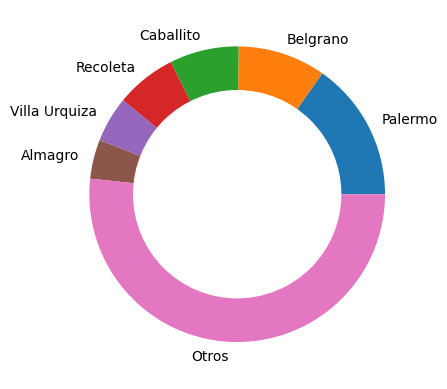

In [74]:
# create data
names = ['Palermo', 'Belgrano', 'Caballito', 'Recoleta', 'Villa Urquiza', 'Almagro', 'Nuñez','Otros']
otros = 100 - (15.228256+9.620894+7.571463+6.619126+4.997867+4.283233+3.757629)
size = [15.228256,9.620894,7.571463,6.619126,4.997867,4.283233, 3.757629, otros]

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

In [75]:
df_train.loc[df_train['place_l3'].isna()==True].shape[0]/df_train.shape[0] *100

0.3613396896729724

La distribución de estas 238 publicaciones restantes (el 0.36% del total) se la va a completar según el porcentaje de cada barrio allado anteriormente para no modificar las medias. Concecuentemente al 15.23% de dichos 238 datos restantes se los conciderarán como si estubieran en Palermo, al 9.62% en Belgrano y así.

In [76]:
barrios=df_no_nan.value_counts('place_l3').keys().tolist()
barrios_count=df_no_nan.value_counts('place_l3') / df_no_nan['place_l3'].shape[0]
df_na=df_train.loc[df_train['place_l3'].isna()==True]
barrios_list =[]
amount= df_na.shape[0]
i=0
while len(barrios_list)<amount:
    for x in range (0,int(amount*barrios_count[i])+1):
        barrios_list.append(barrios[i])
    i+=1
barrios_list=barrios_list[0:amount]
random.shuffle(barrios_list)
df_train.loc[df_train['place_l3'].isna()==True,'place_l3'] = barrios_list

Ahora al analizar la cantidad de datos que tienen datos faltantes descubrimos que no hay ninguno en dicha cituación.

In [77]:
df_train['latitud'].fillna(media_latitud, inplace=True)
df_train['longitud'].fillna(media_longitud, inplace=True)
df_train['property_rooms'].fillna(media_property_rooms, inplace=True)
df_train['property_bedrooms'].fillna(media_property_bedrooms, inplace=True)
df_train['property_surface_total'].fillna(media_property_surface_total, inplace=True)
df_train['property_surface_covered'].fillna(media_property_surface_covered, inplace=True)
df_train.astype("str").eq("nan").sum()

id                          0
start_date                  0
end_date                    0
created_on                  0
latitud                     0
longitud                    0
place_l2                    0
place_l3                    0
operation                   0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_currency           0
property_title              0
type_casa                   0
type_dpto                   0
dtype: int64

In [78]:
df_new_train=df_train.copy()

In [ ]:
df_train['barrio_Palermo'] = df_train['place_l3'].apply(lambda x: 1 if x == 'Palermo' else 0)
df_train['barrio_Belgano'] = df_train['place_l3'].apply(lambda x: 1 if x == 'Belgano' else 0)
df_train['barrio_Recoleta'] = df_train['place_l3'].apply(lambda x: 1 if x == 'Recoleta' else 0)
df_train['barrio_Caballito'] = df_train['place_l3'].apply(lambda x: 1 if x == 'Caballito' else 0)
df_train['barrio_Villa_Urquiza'] = df_train['place_l3'].apply(lambda x: 1 if x == 'Villa Urquiza' else 0)
df_train['barrio_Almagro'] = df_train['place_l3'].apply(lambda x: 1 if x == 'Almagro' else 0)
columna_place_l3 = ['place_l3']
df_place_l3=df_train['place_l3']
df_train.drop(columna_place_l3, axis="columns", inplace=True)

#**Datos relevantes para el problema**

In [ ]:
df_train.sample(4)

id  start_date    end_date  created_on  \
270493  8X12xRYa+APY884j8hyJxw==  2021-07-13  2022-08-29  2021-07-13   
384316  U/d+9iza5Ci7ezCWdKffTw==  2021-09-06  2022-01-27  2021-09-06   
36987   3aE2vfiPBwLSYoTDYkQvCQ==  2021-09-21  2022-01-27  2021-09-21   
347050  lokG0l40xAk+pFNrFyOTdg==  2021-09-30  2022-03-09  2021-09-30   

          latitud   longitud         place_l2 operation  property_rooms  \
270493 -34.609868 -58.431563  Capital Federal     Venta             3.0   
384316 -34.585388 -58.412572  Capital Federal     Venta             4.0   
36987  -34.624865 -58.376924  Capital Federal     Venta             2.0   
347050 -34.592914 -58.412187  Capital Federal     Venta             5.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
270493                2.0                    61.0                      58.0   
384316                3.0                    97.0                      88.0   
36987                 1.0                    49.0                      46.0   
347050                5.0                   220.0                     160.0   

       property_currency                                     property_title  \
270493               USD                           Departamento - Caballito   
384316               USD                             Departamento - Palermo   
36987                USD  Alucinante Departamento 2 Ambientes a Estrenar...   
347050               USD               Departamento en Venta 5 AMBIENTES -    

        type_casa  type_dpto  barrio_Palermo  barrio_Belgano  barrio_Recoleta  \
270493          0          1               0               0                0   
384316          0          1               1               0                0   
36987           0          1               0               0                0   
347050          0          1               1               0                0   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  
270493                 1                     0               0  
384316                 0                     0               0  
36987                  0                     0               0  
347050                 0                     0               0

Observando nuestro dataset, notamos que hay algun informacion que es poco relevante para nuestro problema, como por ejemplo, las columnas 'property_currency' (ya se que todos los anuncios estan en dolares), 'operation' (ya se que todos los anuncios estan en venta), 'place_l2' (ya se que todos los anuncios estan en CABA), 'id', 'start_date',	'end_date', 'created_on' y 'property_title' (Ya que no me aportan una informacion relevante para la investigacion).

Decidimos removerlos de nuestro dataset.

In [ ]:
columnas_irrelevantes_eliminar = ['property_currency', 'operation', 'property_title', 'place_l2',  'id', 'start_date', 'end_date', 'created_on' ]
df_train.drop(columnas_irrelevantes_eliminar, axis="columns", inplace=True)
df_train.columns

Index(['latitud', 'longitud', 'property_rooms', 'property_bedrooms',
       'property_surface_total', 'property_surface_covered', 'type_casa',
       'type_dpto', 'barrio_Palermo', 'barrio_Belgano', 'barrio_Recoleta',
       'barrio_Caballito', 'barrio_Villa_Urquiza', 'barrio_Almagro'],
      dtype='object')

In [ ]:
df_train.head()

latitud   longitud  property_rooms  property_bedrooms  \
42281  -34.626493 -58.491926             2.0                1.0   
63945  -34.617536 -58.447917             3.0                2.0   
420757 -34.586193 -58.387248             4.0                3.0   
93305  -34.573464 -58.482707             3.0                2.0   
268529 -34.629053 -58.365905             3.0                2.0   

        property_surface_total  property_surface_covered  type_casa  \
42281                     44.0                      44.0          0   
63945                     69.0                      63.0          0   
420757                    95.0                      95.0          0   
93305                     66.0                      59.0          0   
268529                    54.0                      51.0          0   

        type_dpto  barrio_Palermo  barrio_Belgano  barrio_Recoleta  \
42281           1               0               0                0   
63945           1               0               0                0   
420757          1               0               0                1   
93305           1               0               0                0   
268529          1               0               0                0   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  
42281                  0                     0               0  
63945                  1                     0               0  
420757                 0                     0               0  
93305                  0                     1               0  
268529                 0                     0               0

#**Distribuciones de las variables mas relevantes del problema y manejo de outliers**

Queremos ver que distribucion tiene algunas variables (la que concideramos mas relevante para el analisis). Por ende concidermos la variable de la cantiad de ambiente y habitaciones del inmueble y la suberficie total y de la cubierta del mismo.

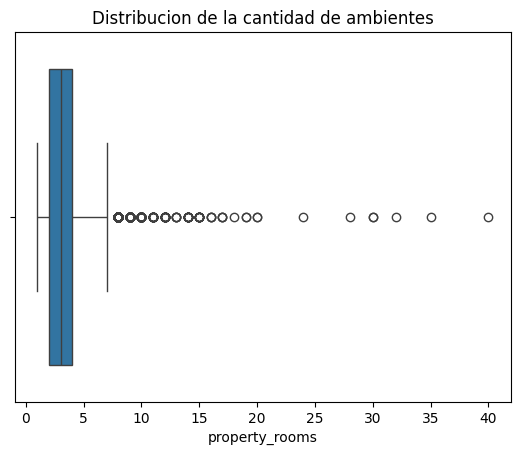

In [ ]:
sns.boxplot(x=df_train["property_rooms"])
plt.title("Distribucion de la cantidad de ambientes")
plt.show()

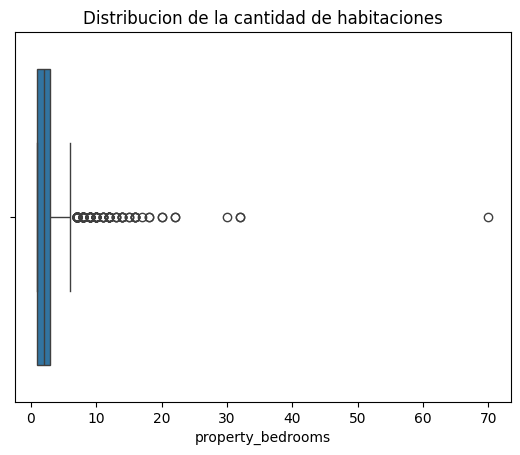

In [ ]:
sns.boxplot(x=df_train["property_bedrooms"])
plt.title("Distribucion de la cantidad de habitaciones")
plt.show()

In [ ]:
sns.boxplot(x=df_train["property_surface_total"])
plt.title("Distribucion de la superficie total")
plt.show()

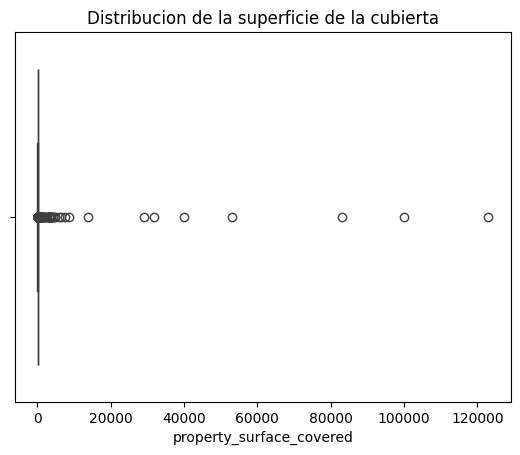

In [ ]:
sns.boxplot(x=df_train["property_surface_covered"])
plt.title("Distribucion de la superficie de la cubierta")
plt.show()

Observamos que en cada variable hay varios valores atipicos univariados, y para ientificar dichos valores vamos a utilizar la tecnica de Z-score.

In [ ]:
def z_calculation(serie):
  media = np.mean(serie)
  std = np.std(serie)
  return (serie - media) / std

El metodo de Z-score, al calcular el Z para cada observacion se considera un valor atipico cuando sel valor el Z de dicha observacion en mayor a 3 o menor a -3.

Calcular el Z para las variables de la cantidad de ambiete y habitaciones totales, y la superficie total y de la cubierta.

In [ ]:
df_train['z_property_bedrooms'] = z_calculation(df_train.property_bedrooms)
df_train['z_property_rooms'] = z_calculation(df_train.property_rooms)
df_train['z_property_surface_total'] = z_calculation(df_train.property_surface_total)
df_train['z_property_surface_covered'] = z_calculation(df_train.property_surface_covered)

In [ ]:
df_train[['z_property_bedrooms', 'z_property_rooms', 'z_property_surface_total', 'z_property_surface_covered']].head()

z_property_bedrooms  z_property_rooms  z_property_surface_total  \
42281             -0.945566         -0.579426                 -0.077156   
63945             -0.011305          0.125002                 -0.053824   
420757             0.922956          0.829429                 -0.029558   
93305             -0.011305          0.125002                 -0.056624   
268529            -0.011305          0.125002                 -0.067823   

        z_property_surface_covered  
42281                    -0.165416  
63945                    -0.146387  
420757                   -0.114339  
93305                    -0.150394  
268529                   -0.158406

Encontrar dichas observaciones que se consideran outliers.

In [ ]:
condicion_outlier = (df_train['z_property_bedrooms'] > 3) | (df_train['z_property_bedrooms'] < -3) | (df_train['z_property_rooms'] > 3) | (df_train['z_property_rooms'] < -3) | (df_train['z_property_surface_total'] > 3) | (df_train['z_property_surface_total'] < -3) | (df_train['z_property_surface_covered'] > 3) | (df_train['z_property_surface_covered'] < -3)
df_train_outliers = df_train[condicion_outlier]
print("Hay ", df_train_outliers.shape[0], " observaciones con outliers.")

print("\n\nValores atipicos de la superficie total")
display(df_train[(df_train['z_property_surface_total'] > 3) | (df_train['z_property_surface_total'] < -3)].head(5))

print("\n\nValores atipicos de la superficie de la cubierta")
display(df_train[(df_train['z_property_surface_covered'] > 3) | (df_train['z_property_surface_covered'] < -3)].head(5))


Hay  3042  observaciones con outliers.


Valores atipicos de la superficie total


latitud   longitud  property_rooms  property_bedrooms  \
370917 -34.571747 -58.422612             4.0                3.0   
313745 -34.649174 -58.413106             6.0                2.0   
72521  -34.600113 -58.403649             2.0                1.0   
459588 -34.574650 -58.437659             3.0                2.0   
356064 -31.198907 -60.159719             3.0                2.0   

        property_surface_total  property_surface_covered  type_casa  \
370917                 42110.0                     222.0          0   
313745                  8988.0                    7454.0          0   
72521                  33800.0                   31670.0          0   
459588                  6609.0                      60.0          0   
356064                 60000.0                     350.0          1   

        type_dpto  barrio_Palermo  barrio_Belgano  barrio_Recoleta  \
370917          1               1               0                0   
313745          0               0               0                0   
72521           1               0               0                0   
459588          1               0               0                0   
356064          0               0               0                0   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
370917                 0                     0               0   
313745                 0                     0               0   
72521                  0                     0               0   
459588                 0                     0               0   
356064                 0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
370917             0.922956          0.829429                 39.182608   
313745            -0.011305          2.238284                  8.270187   
72521             -0.945566         -0.579426                 31.426970   
459588            -0.011305          0.125002                  6.049891   
356064            -0.011305          0.125002                 55.879160   

        z_property_surface_covered  
370917                    0.012852  
313745                    7.255738  
72521                    31.508191  
459588                   -0.149392  
356064                    0.141045



Valores atipicos de la superficie de la cubierta


latitud   longitud  property_rooms  property_bedrooms  \
269895 -34.618328 -58.464596             2.0                1.0   
404410 -34.624200 -58.460737             4.0                3.0   
128725 -34.616003 -58.413557             1.0                2.0   
278751 -34.609810 -58.424042             3.0                2.0   
364996 -34.546152 -58.462487             3.0                2.0   

        property_surface_total  property_surface_covered  type_casa  \
269895                    45.0               3515.811779          0   
404410                   120.0               3515.811779          0   
128725                    30.0               3515.811779          0   
278751                    88.0               3515.811779          0   
364996                   115.0               3515.811779          0   

        type_dpto  barrio_Palermo  barrio_Belgano  barrio_Recoleta  \
269895          1               0               0                0   
404410          1               0               0                0   
128725          1               0               0                0   
278751          1               0               0                0   
364996          1               0               0                0   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
269895                 0                     0               0   
404410                 0                     0               0   
128725                 0                     0               1   
278751                 0                     0               1   
364996                 0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
269895            -0.945566         -0.579426                 -0.076223   
404410             0.922956          0.829429                 -0.006226   
128725            -0.011305         -1.283854                 -0.090222   
278751            -0.011305          0.125002                 -0.036091   
364996            -0.011305          0.125002                 -0.010892   

        z_property_surface_covered  
269895                    3.311622  
404410                    3.311622  
128725                    3.311622  
278751                    3.311622  
364996                    3.311622

Observemos las caracteristicas que tiene los outlier de los ambientes y habitaciones **(outliers multiples)**.

In [ ]:
print("\n\nValores atipicos de los ambientes")
df_oulier_rooms = df_train[(df_train['z_property_rooms'] > 3) | (df_train['z_property_rooms'] < -3)]
display(df_oulier_rooms.head(2))

print("\n\nValores atipicos de las habitaciones")
df_oulier_bedrooms = df_train[(df_train['z_property_bedrooms'] > 3) | (df_train['z_property_bedrooms'] < -3)]
display(df_oulier_bedrooms.head(2))

df_outlier_rooms_bedrooms = df_train[(df_train['z_property_rooms'] > 3) | (df_train['z_property_rooms'] < -3) | (df_train['z_property_bedrooms'] > 3) | (df_train['z_property_bedrooms'] < -3)]

condicion_rooms = (df_outlier_rooms_bedrooms['z_property_rooms'] > 3) | (df_outlier_rooms_bedrooms['z_property_rooms'] < -3)
condicion_bedrooms = (df_outlier_rooms_bedrooms['z_property_bedrooms'] > 3) | (df_outlier_rooms_bedrooms['z_property_bedrooms'] < -3)

# Crea el gráfico de dispersión
plt.scatter(df_outlier_rooms_bedrooms[condicion_rooms]['property_rooms'], df_outlier_rooms_bedrooms[condicion_rooms]['property_bedrooms'], color='blue', label='Outliers de los ambientes')
plt.scatter(df_outlier_rooms_bedrooms[condicion_bedrooms]['property_rooms'], df_outlier_rooms_bedrooms[condicion_bedrooms]['property_bedrooms'], color='red', label='Outliers de las habitaciones')

# Personaliza el gráfico
plt.xlabel('property_rooms')
plt.ylabel('property_bedrooms')
plt.title('Outliers de los ambientes y de las habutaciones')
plt.legend()

# Muestra el gráfico
plt.show()



Valores atipicos de los ambientes


latitud   longitud  property_rooms  property_bedrooms  \
195609 -34.612036 -58.415431            11.0                9.0   
321112 -34.590923 -58.384214             9.0                4.0   

        property_surface_total  property_surface_covered  type_casa  \
195609                   370.0                     280.0          0   
321112                   668.0                     668.0          0   

        type_dpto  barrio_Palermo  barrio_Belgano  barrio_Recoleta  \
195609          0               0               0                0   
321112          1               0               0                1   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
195609                 0                     0               1   
321112                 0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
195609             6.528524          5.760422                  0.227096   
321112             1.857218          4.351567                  0.505217   

        z_property_surface_covered  
195609                    0.070939  
321112                    0.459523



Valores atipicos de las habitaciones


latitud   longitud  property_rooms  property_bedrooms  \
195609 -34.612036 -58.415431            11.0                9.0   
72640  -34.602843 -58.386216             8.0                7.0   

        property_surface_total  property_surface_covered  type_casa  \
195609                   370.0                     280.0          0   
72640                    195.0                     190.0          0   

        type_dpto  barrio_Palermo  barrio_Belgano  barrio_Recoleta  \
195609          0               0               0                0   
72640           1               0               0                0   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
195609                 0                     0               1   
72640                  0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
195609             6.528524          5.760422                  0.227096   
72640              4.660001          3.647140                  0.063771   

        z_property_surface_covered  
195609                    0.070939  
72640                    -0.019196

Observamos que hay siertos outliers entre los rooms y bedrooms que tienen alguna relacion y pueden tener algun sentio si lo comparamos con la superficie total del inmueble.

Con esta relacion podemos ver si entre dichas observaciones tienen valores coherentes.

pero hay algunos puntos que estan mas alejados del conjunto de puntos y dichos puntos no tienen mucho sentidos (por ejemplo tener mas de 50 habitaciones y tener menos e 5 ambientes)

In [ ]:
# Calulo el vector de medias
vmedias = np.mean(df_outlier_rooms_bedrooms[["property_rooms", "property_bedrooms"]])

# Calculo la diferencia entre las observaciones y el vector de medias
x_dif = df_outlier_rooms_bedrooms[["property_rooms", "property_bedrooms"]] - vmedias

# Calculo matriz de covarianza y su inversa
cov = df_outlier_rooms_bedrooms[["property_rooms", "property_bedrooms"]].cov().values
inv_cov = np.linalg.inv(cov)

# Calculamos el cuadrado de la distancia de mahalanobis
mahal = np.dot(np.dot(x_dif, inv_cov), x_dif.T)

df_outlier_rooms_bedrooms["mahalanobis_rooms_bedrooms"] = mahal.diagonal()

<ipython-input-87-d049058e2027>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier_rooms_bedrooms["mahalanobis_rooms_bedrooms"] = mahal.diagonal()


<Axes: ylabel='mahalanobis_rooms_bedrooms'>

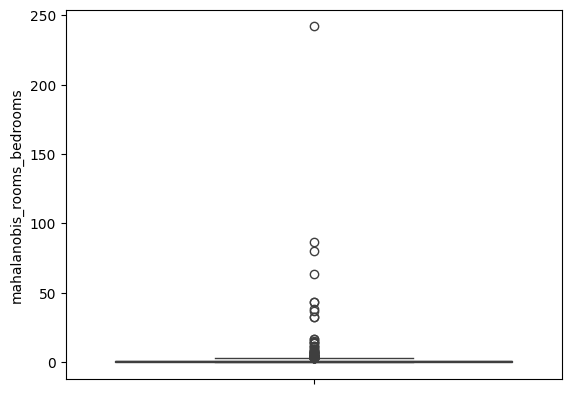

In [ ]:
sns.boxplot(y=df_outlier_rooms_bedrooms.mahalanobis_rooms_bedrooms)

In [ ]:
# Defino umbral
umbral = 7

# Observacione anómalas
condicion_outlier_rooms_bedrooms = df_outlier_rooms_bedrooms["mahalanobis_rooms_bedrooms"] > umbral
df_outlier_multivariados_rooms_bedrooms = df_outlier_rooms_bedrooms[condicion_outlier_rooms_bedrooms]
df_outlier_multivariados_rooms_bedrooms.head()

latitud   longitud  property_rooms  property_bedrooms  \
48279  -34.608645 -58.485619             4.0               32.0   
90686  -34.590064 -58.395623            17.0                8.0   
90004  -34.633236 -58.480313            32.0               32.0   
438314 -34.624766 -58.418918            20.0                2.0   
122415 -34.619163 -58.371500            15.0                1.0   

        property_surface_total  property_surface_covered  type_casa  \
48279                     83.0                      75.0          0   
90686                    616.0                     616.0          1   
90004                    535.0                     435.0          0   
438314                  1019.0                    1019.0          0   
122415                    33.0                      33.0          0   

        type_dpto  barrio_Palermo  barrio_Belgano  barrio_Recoleta  \
48279           1               0               0                0   
90686           0               0               0                1   
90004           0               0               0                0   
438314          0               0               0                0   
122415          0               0               0                0   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
48279                  0                     0               0   
90686                  0                     0               0   
90004                  0                     0               0   
438314                 0                     0               0   
122415                 0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
48279             28.016533          0.829429                 -0.040758   
90686              5.594263          9.986988                  0.456686   
90004             28.016533         20.553402                  0.381089   
438314            -0.011305         12.100271                  0.832801   
122415            -0.945566          8.578133                 -0.087422   

        z_property_surface_covered  mahalanobis_rooms_bedrooms  
48279                    -0.134369                   38.337252  
90686                     0.407445                    7.284913  
90004                     0.226172                   80.195131  
438314                    0.811052                   14.921843  
122415                   -0.176433                    7.462002

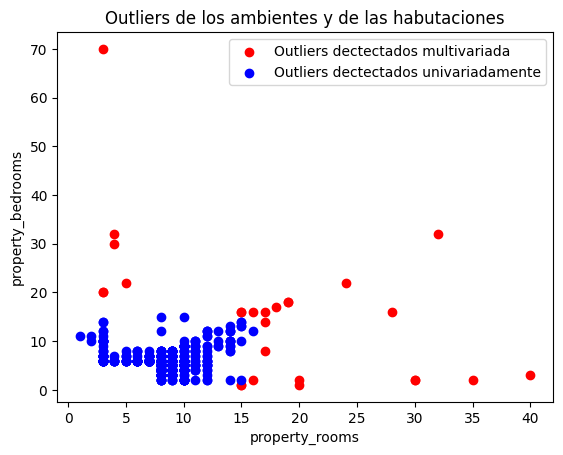

In [ ]:
negada_condicion_outlier_rooms_bedrooms = ~(condicion_outlier_rooms_bedrooms)
# Crea el gráfico de dispersión
plt.scatter(df_outlier_multivariados_rooms_bedrooms['property_rooms'], df_outlier_multivariados_rooms_bedrooms['property_bedrooms'], color='red', label='Outliers dectectados multivariada')
plt.scatter(df_outlier_rooms_bedrooms[negada_condicion_outlier_rooms_bedrooms]['property_rooms'], df_outlier_rooms_bedrooms[negada_condicion_outlier_rooms_bedrooms]['property_bedrooms'], color='blue', label='Outliers dectectados univariadamente')

# Personaliza el gráfico
plt.xlabel('property_rooms')
plt.ylabel('property_bedrooms')
plt.title('Outliers de los ambientes y de las habutaciones')
plt.legend()



# Muestra el gráfico
plt.show()

Vemos que hay algunas observaciones (marcadas como ouliers) que pueden tener sentido tomarlas encuenta para el analisis del problema.

Hay observaciones con una cantidad importante de ambientes y habitaciones, la idea seria estudiar las observaciones con dichas caracteristicas y analizarlas para tomarlos en cuenta a la hora del analisis del problema.

Tomaremos como un numero importante de habitaciones como **10**.

Aquellas observaciones (de los ouliers multivariados) que tienen una cantidad de ambientes y habitaciones menores a 10 seran eliminadas del dataset, ya que no tiene sentido analizar una observacion con 70 habitaciones y 5 ambientes.

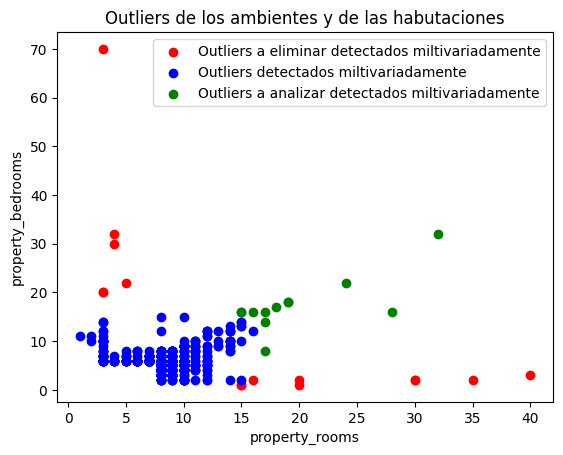

In [ ]:
#Observaciones atipicas que no tienen sentios analizarlas
df_outlier_rooms_bedrooms_eliminar = df_outlier_rooms_bedrooms[(condicion_outlier_rooms_bedrooms) & ((df_outlier_rooms_bedrooms['property_bedrooms'] < 8) | (df_outlier_rooms_bedrooms['property_rooms'] < 8))]
#Observaciones atipicas que si tienen sentios analizarlas
df_outlier_rooms_bedrooms_analizar = df_outlier_rooms_bedrooms[(condicion_outlier_rooms_bedrooms) & ((df_outlier_rooms_bedrooms['property_bedrooms'] >= 8) & (df_outlier_rooms_bedrooms['property_rooms'] >= 8))]

plt.scatter(df_outlier_rooms_bedrooms_eliminar['property_rooms'], df_outlier_rooms_bedrooms_eliminar['property_bedrooms'], color='red', label='Outliers a eliminar detectados miltivariadamente')
plt.scatter(df_outlier_rooms_bedrooms[negada_condicion_outlier_rooms_bedrooms]['property_rooms'], df_outlier_rooms_bedrooms[negada_condicion_outlier_rooms_bedrooms]['property_bedrooms'], color='blue', label='Outliers detectados miltivariadamente')
plt.scatter(df_outlier_rooms_bedrooms_analizar['property_rooms'], df_outlier_rooms_bedrooms_analizar['property_bedrooms'], color='green', label='Outliers a analizar detectados miltivariadamente')

# Personaliza el gráfico
plt.xlabel('property_rooms')
plt.ylabel('property_bedrooms')
plt.title('Outliers de los ambientes y de las habutaciones')
plt.legend()


In [ ]:
#Eliminar las observaciones atipicas que no tienen sentios analizarlas
for x in range(df_outlier_rooms_bedrooms_eliminar.shape[0]):
  index = df_outlier_rooms_bedrooms_eliminar.index[x]
  df_train.drop(index, inplace=True)

Analizaremos las observaciones atipicas. Si el inmueble tiene una superficie total importante para contener las habitaciones, tiene sentido incluir dichas observaciones en el analisis del problema.

Consideramos una superficie total importante del inmueble como **250 metros cuaddrados.**

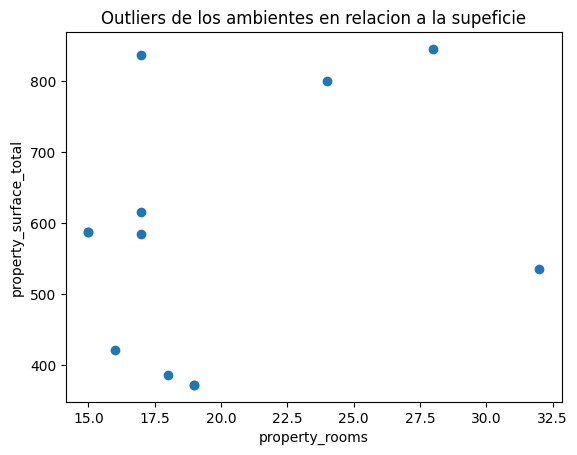

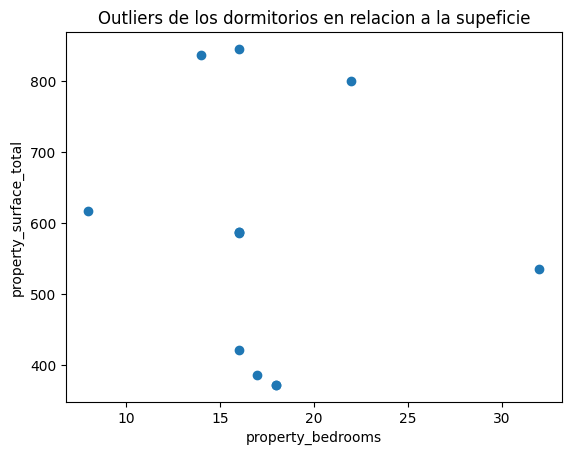

In [ ]:
df_outlier_rooms_bedrooms_analizar_sup = df_outlier_rooms_bedrooms_analizar[df_outlier_rooms_bedrooms_analizar['property_surface_total'] >= 250]

plt.scatter(df_outlier_rooms_bedrooms_analizar_sup['property_rooms'], df_outlier_rooms_bedrooms_analizar_sup['property_surface_total'])
# Personaliza el gráfico
plt.xlabel('property_rooms')
plt.ylabel('property_surface_total')
plt.title('Outliers de los ambientes en relacion a la supeficie')
plt.show()

plt.scatter(df_outlier_rooms_bedrooms_analizar_sup['property_bedrooms'], df_outlier_rooms_bedrooms_analizar_sup['property_surface_total'])
# Personaliza el gráfico
plt.xlabel('property_bedrooms')
plt.ylabel('property_surface_total')
plt.title('Outliers de los dormitorios en relacion a la supeficie')
plt.show()


Vemos que cada uno de los inmuebles que posee una cantidad importante de ambientes y dormitorios contienen una importante superficie que las contiene. Por ende vamos a tomar en cuentas estas observaciones a la hora de hacer el analisis del problema.

Observamos que hay algunos valores de outliers de rooms que tienen sentido si se relacionan con los bedrooms. Por ende las observaciones con outliers alejados seran eliminados

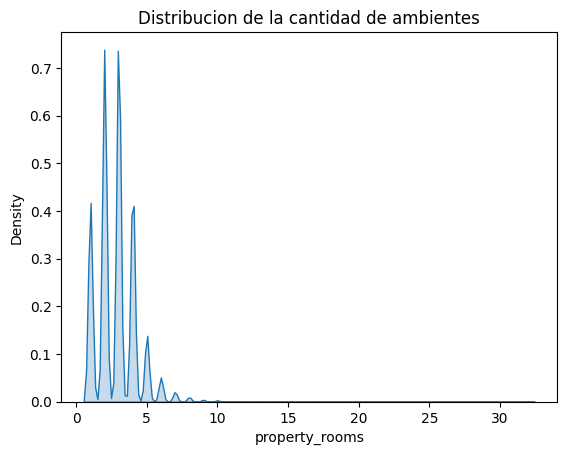

In [ ]:
sns.kdeplot(x=df_train["property_rooms"], fill=True)
plt.title("Distribucion de la cantidad de ambientes")
plt.show()

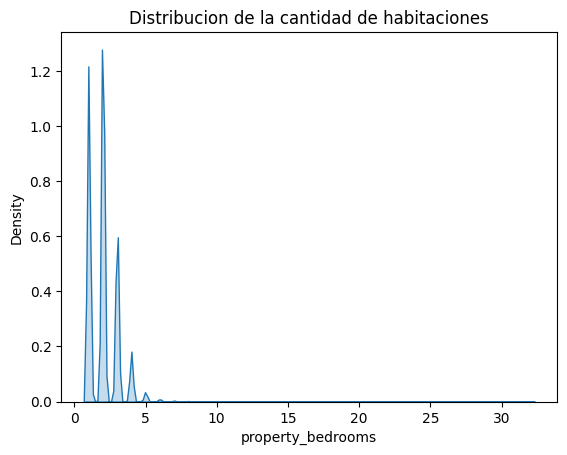

In [ ]:
sns.kdeplot(x=df_train["property_bedrooms"], fill=True)
plt.title("Distribucion de la cantidad de habitaciones")
plt.show()

Ahora vamos hacer la misma relacion con las variables de los ambientes y habitaciones que hicimos para encontrar outliers (multiples) pero ahora con las variables de la superficie.



Valores atipicos de sup total.


latitud   longitud  property_rooms  property_bedrooms  \
370917 -34.571747 -58.422612             4.0                3.0   
313745 -34.649174 -58.413106             6.0                2.0   

        property_surface_total  property_surface_covered  type_casa  \
370917                 42110.0                     222.0          0   
313745                  8988.0                    7454.0          0   

        type_dpto  barrio_Palermo  barrio_Belgano  barrio_Recoleta  \
370917          1               1               0                0   
313745          0               0               0                0   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
370917                 0                     0               0   
313745                 0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
370917             0.922956          0.829429                 39.182608   
313745            -0.011305          2.238284                  8.270187   

        z_property_surface_covered  
370917                    0.012852  
313745                    7.255738



Valores atipicos de la sup cubierta


latitud   longitud  property_rooms  property_bedrooms  \
269895 -34.618328 -58.464596             2.0                1.0   
404410 -34.624200 -58.460737             4.0                3.0   

        property_surface_total  property_surface_covered  type_casa  \
269895                    45.0               3515.811779          0   
404410                   120.0               3515.811779          0   

        type_dpto  barrio_Palermo  barrio_Belgano  barrio_Recoleta  \
269895          1               0               0                0   
404410          1               0               0                0   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
269895                 0                     0               0   
404410                 0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
269895            -0.945566         -0.579426                 -0.076223   
404410             0.922956          0.829429                 -0.006226   

        z_property_surface_covered  
269895                    3.311622  
404410                    3.311622

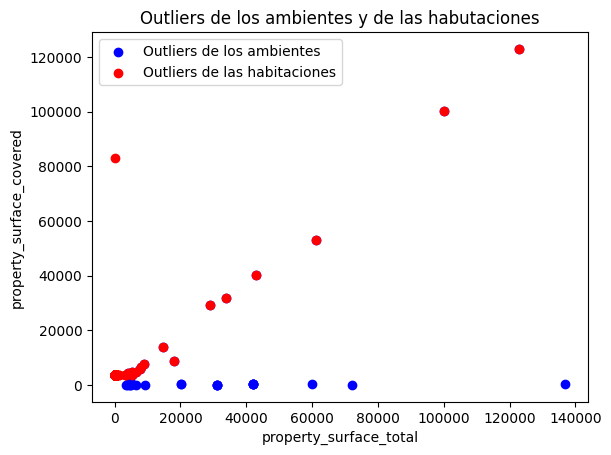

In [ ]:
print("\n\nValores atipicos de sup total.")
df_oulier_sup_total = df_train[(df_train['z_property_surface_total'] > 3) | (df_train['z_property_surface_total'] < -3)]
display(df_oulier_sup_total.head(2))

print("\n\nValores atipicos de la sup cubierta")
df_oulier_sup_cub = df_train[(df_train['z_property_surface_covered'] > 3) | (df_train['z_property_surface_covered'] < -3)]
display(df_oulier_sup_cub.head(2))

#Combinar el df de los ouliers de los rooms con el df de los outliers de los bedrooms en un solo df
df_outlier_sup_total_cub = df_train[(df_train['z_property_surface_total'] > 3) | (df_train['z_property_surface_total'] < -3) | (df_train['z_property_surface_covered'] > 3) | (df_train['z_property_surface_covered'] < -3)]
#df_outlier_sup_total_cub = pd.concat([df_oulier_sup_total, df_oulier_sup_cub], ignore_index=False)
#df_outlier_sup_total_cub = df_outlier_sup_total_cub.drop_duplicates()


condicion_sup_total = (df_outlier_sup_total_cub['z_property_surface_total'] > 3) | (df_outlier_sup_total_cub['z_property_surface_total'] < -3)
condicion_sup_cub = (df_outlier_sup_total_cub['z_property_surface_covered'] > 3) | (df_outlier_sup_total_cub['z_property_surface_covered'] < -3)

# Crea el gráfico de dispersión
plt.scatter(df_outlier_sup_total_cub[condicion_sup_total]['property_surface_total'], df_outlier_sup_total_cub[condicion_sup_total]['property_surface_covered'], color='blue', label='Outliers de los ambientes')
plt.scatter(df_outlier_sup_total_cub[condicion_sup_cub]['property_surface_total'], df_outlier_sup_total_cub[condicion_sup_cub]['property_surface_covered'], color='red', label='Outliers de las habitaciones')

# Personaliza el gráfico
plt.xlabel('property_surface_total')
plt.ylabel('property_surface_covered')
plt.title('Outliers de los ambientes y de las habutaciones')
plt.legend()

# Muestra el gráfico
plt.show()

Observamos que hay siertos outliers entre las superficies totales y cubiertas que tienen alguna relacion y pueden tener algun sentido estos valores.

Con esta relacion podemos ver si entre dichas observaciones tienen valores coherentes.

In [ ]:
# Calulo el vector de medias
vmedias = np.mean(df_outlier_sup_total_cub[["property_surface_total",	"property_surface_covered"]])

# Calculo la diferencia entre las observaciones y el vector de medias
x_dif = df_outlier_sup_total_cub[["property_surface_total",	"property_surface_covered"]] - vmedias

# Calculo matriz de covarianza y su inversa
cov = df_outlier_sup_total_cub[["property_surface_total",	"property_surface_covered"]].cov().values
inv_cov = np.linalg.inv(cov)

# Calculamos el cuadrado de la distancia de mahalanobis
mahal = np.dot(np.dot(x_dif, inv_cov), x_dif.T)

df_outlier_sup_total_cub["mahalanobis_sup_total_cub"] = mahal.diagonal()

<ipython-input-97-445d71ef4100>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier_sup_total_cub["mahalanobis_sup_total_cub"] = mahal.diagonal()


<Axes: ylabel='mahalanobis_sup_total_cub'>

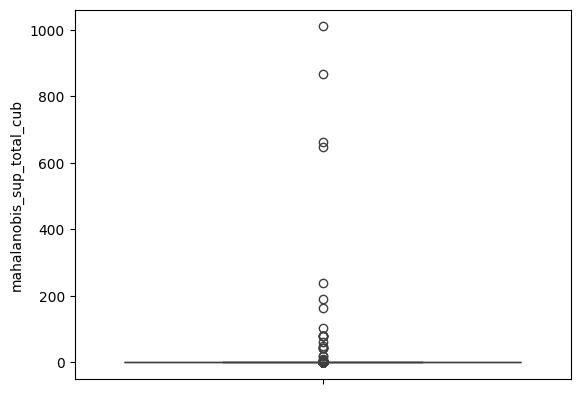

In [ ]:
sns.boxplot(y=df_outlier_sup_total_cub.mahalanobis_sup_total_cub)

In [ ]:
# Defino umbral
umbral = 0.3
# Observacione anómalas
condicion_outlier_sup_total_cub = df_outlier_sup_total_cub["mahalanobis_sup_total_cub"] > umbral
df_outlier_sup_total_cub[condicion_outlier_sup_total_cub].head()
df_outlier_sup_total_cub[condicion_outlier_sup_total_cub].shape[0]

2386

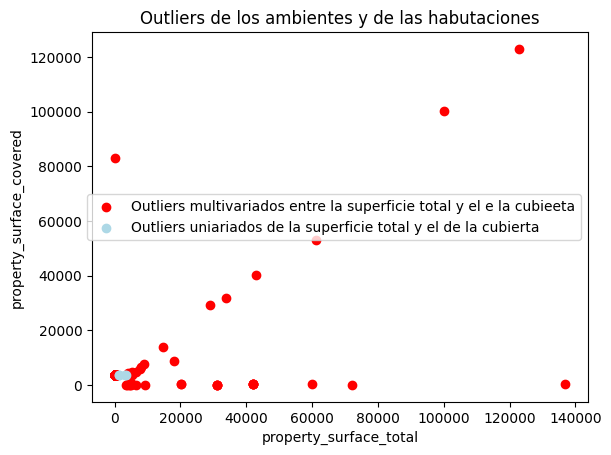

In [ ]:
negada_condicion_outlier_sup_total_cub = ~(condicion_outlier_sup_total_cub)
# Crea el gráfico de dispersión
plt.scatter(df_outlier_sup_total_cub[condicion_outlier_sup_total_cub]['property_surface_total'], df_outlier_sup_total_cub[condicion_outlier_sup_total_cub]['property_surface_covered'], color='red', label='Outliers multivariados entre la superficie total y el e la cubieeta')
plt.scatter(df_outlier_sup_total_cub[negada_condicion_outlier_sup_total_cub]['property_surface_total'], df_outlier_sup_total_cub[negada_condicion_outlier_sup_total_cub]['property_surface_covered'], color='lightblue', label='Outliers uniariados de la superficie total y el de la cubierta')

# Personaliza el gráfico
plt.xlabel('property_surface_total')
plt.ylabel('property_surface_covered')
plt.title('Outliers de los ambientes y de las habutaciones')
plt.legend()



# Muestra el gráfico
plt.show()

Observamos que hay algunos valores de outliers de las superficies totales que tienen sentido si se relacionan con las superficies ede la cubierta. Por ende las observaciones con outliers alejados seran eliminados

In [ ]:
for x in range(df_outlier_sup_total_cub.shape[0]):
  index = df_outlier_sup_total_cub.index[x]
  df_train.drop(index, inplace=True)

In [ ]:
sns.kdeplot(x=df_train["property_surface_total"], fill=True)
#sns.boxplot(x=df_train["property_surface_total"])
plt.title("Distribucion de la superficie total")
plt.show()

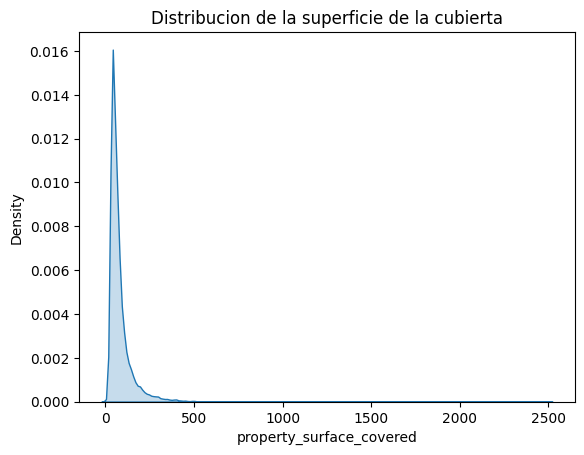

In [ ]:
sns.kdeplot(x=df_train["property_surface_covered"], fill=True)
#sns.boxplot(x=df_train["property_surface_covered"])
plt.title("Distribucion de la superficie de la cubierta")
plt.show()

Llama la atencion los inmuebles que tenga una superficie de cubierta mayor de 500 metros cuatrados  y una superficie total mayor o igual a 700 metros cuadrados. Por ende trataremos de analizar dichas observaciones.

In [ ]:
condicion_sup_total_cub = (df_train['property_surface_covered'] >= 500) | (df_train['property_surface_total'] >= 700)
df_train_sup_total_cub = df_train[condicion_sup_total_cub]
print("Hay ", df_train_sup_total_cub.shape[0], " inmuebles con una superficies de cubierta mayor o igual a 500 y superficie total mayor igual a 700")

Hay  250  inmuebles con una superficies de cubierta mayor o igual a 500 y superficie total mayor igual a 700



Ver el percentaje que representa dentro de mi dataset


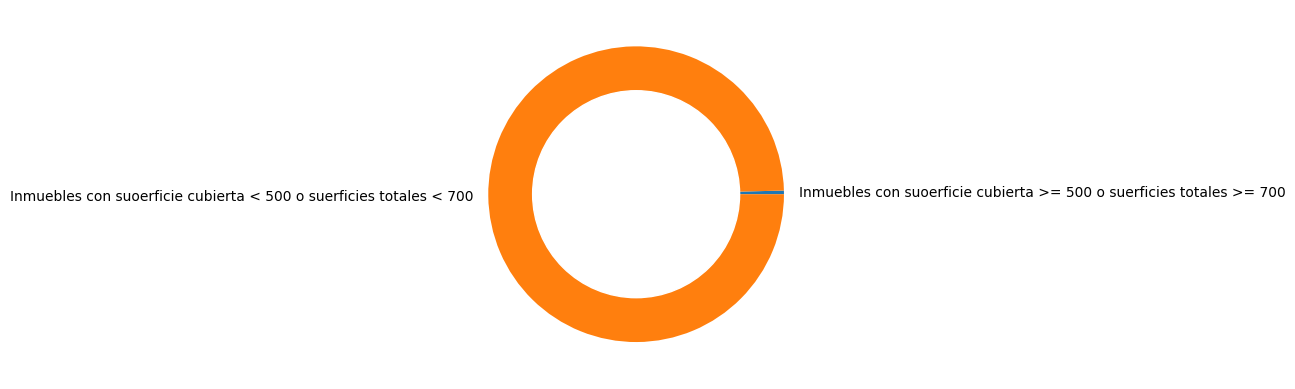

Las superficies cubiertas con  >= a 500 y suerficies totales >= a 700 representan el  0.3939427364838247 % de mi dataset


In [ ]:
names = ['Inmuebles con suoerficie cubierta >= 500 o suerficies totales >= 700', 'Inmuebles con suoerficie cubierta < 500 o suerficies totales < 700']
porcentaje =  (df_train_sup_total_cub.shape[0] / df_train.shape[0]) * 100
otros = 100 - (porcentaje)
size = [porcentaje, otros]
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
print("Las superficies cubiertas con  >= a 500 y suerficies totales >= a 700 representan el ", porcentaje,"% de mi dataset")

Analicemos dichas observaciones.

latitud   longitud  property_rooms  property_bedrooms  \
11618  -34.552132 -58.438498             6.0                5.0   
321112 -34.590923 -58.384214             9.0                4.0   

        property_surface_total  property_surface_covered  type_casa  \
11618                    575.0                     575.0          1   
321112                   668.0                     668.0          0   

        type_dpto  barrio_Palermo  barrio_Belgano  barrio_Recoleta  \
11618           0               0               0                0   
321112          1               0               0                1   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
11618                  0                     0               0   
321112                 0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
11618              2.791479          2.238284                  0.418421   
321112             1.857218          4.351567                  0.505217   

        z_property_surface_covered  
11618                     0.366383  
321112                    0.459523

Text(0.5, 1.0, 'Ambientes y dormitorios de los inmuebles de la superficie cubierta >= 500 y suerficies totales >= a 700')

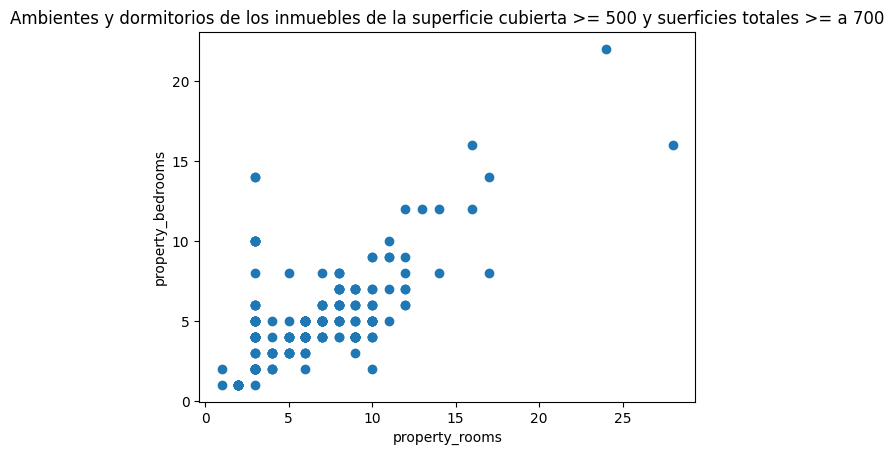

In [ ]:
display(df_train_sup_total_cub.head(2))
plt.scatter(df_train_sup_total_cub['property_rooms'], df_train_sup_total_cub['property_bedrooms'])

# Personaliza el gráfico
plt.xlabel('property_rooms')
plt.ylabel('property_bedrooms')
plt.title('Ambientes y dormitorios de los inmuebles de la superficie cubierta >= 500 y suerficies totales >= a 700')


Podemos observar que si el inmueble tiene la superficie cubierta >= 500 o suerficies totales >= a 700 pero tiene una cantidad de habitaciones o de ambientes chicas no tiene nada de sentido. Por ende deseamos eliminarlo de nuestro dataset ya que no nos aportaria para el analisis a realizar.

Consideramos una cantidad importante de habitaciones a partir de **8**.

In [ ]:
condicion_outlier_sup_rooms = ((df_train['property_surface_covered'] >= 500) | (df_train['property_surface_total'] >= 700)) & (df_train['property_rooms'] < 8) & (df_train['property_bedrooms'] < 8)

df_train.drop(df_train[condicion_outlier_sup_rooms].index, inplace=True)

En cambio si el inmueble resenta una caracteristica con una cantidad de inmuebles con con la superficie cubierta >= 500 o suerficies totales >= a 700 y tiene una cantidad de habitaciones y dormitorios importantes puede tener sentido ya que se puede identificar como aquellos inmuebles de lujo y poco comunes. Por ejemplo, un departamento dúplex o triplex con múltiples habitaciones, áreas de entretenimiento, terrazas y espacios adicionales.

Analicemos las superficies de aquellas observaciones que tienen ambintes o habitaciones mayor o igual a 8 y cumplen con la restriccion de tener la superficie cubierta >= 500 o suerficies totales >= a 700.

latitud   longitud  property_rooms  property_bedrooms  \
321112 -34.590923 -58.384214             9.0                4.0   
166106 -34.569014 -58.461238            10.0                5.0   

        property_surface_total  property_surface_covered  type_casa  \
321112              668.000000                     668.0          0   
166106              420.965686                     550.0          1   

        type_dpto  barrio_Palermo  barrio_Belgano  barrio_Recoleta  \
321112          1               0               0                1   
166106          0               0               0                0   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
321112                 0                     0               0   
166106                 0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
321112             1.857218          4.351567                  0.505217   
166106             2.791479          5.055995                  0.274662   

        z_property_surface_covered  
321112                    0.459523  
166106                    0.341346

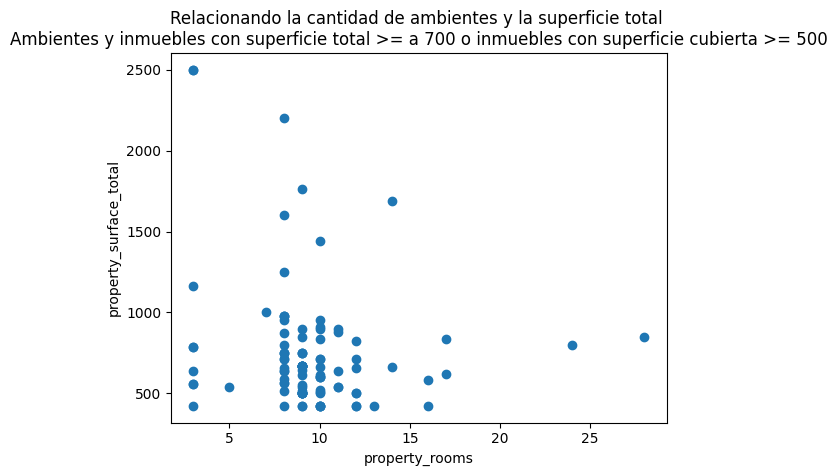

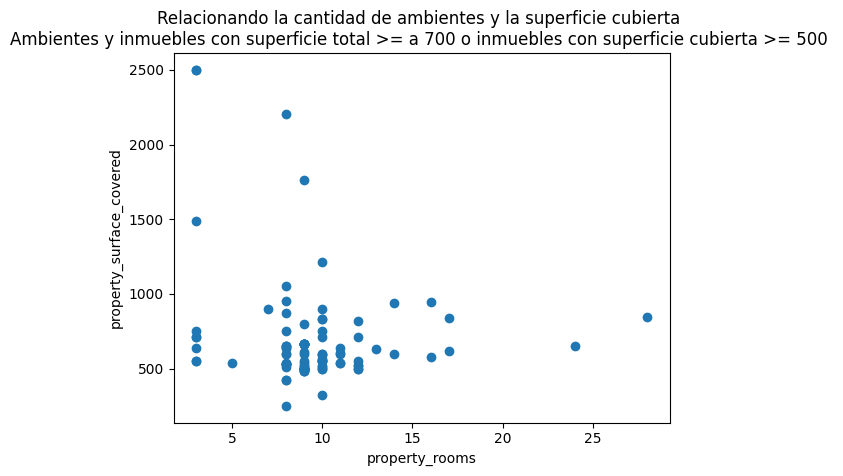

In [ ]:
df_train_sup_total_cub = df_train_sup_total_cub[(df_train_sup_total_cub['property_rooms'] >= 8) | (df_train_sup_total_cub['property_bedrooms'] >= 8)]
display(df_train_sup_total_cub.head(2))

plt.scatter(df_train_sup_total_cub['property_rooms'], df_train_sup_total_cub['property_surface_total'])
# Personaliza el gráfico
plt.xlabel('property_rooms')
plt.ylabel('property_surface_total')
plt.title('Relacionando la cantidad de ambientes y la superficie total \nAmbientes y inmuebles con superficie total >= a 700 o inmuebles con superficie cubierta >= 500')
plt.show()

plt.scatter(df_train_sup_total_cub['property_rooms'], df_train_sup_total_cub['property_surface_covered'])
# Personaliza el gráfico
plt.xlabel('property_rooms')
plt.ylabel('property_surface_covered')
plt.title('Relacionando la cantidad de ambientes y la superficie cubierta \nAmbientes y inmuebles con superficie total >= a 700 o inmuebles con superficie cubierta >= 500 ')
plt.show()


Vemos que hay valores de superficie (tanto como totales como de la cubierta) que superan al 1000 y y es un dato que esta mal en el dataset por ende vamos a reemplazarlo por la media de aquellos inmuebles poco comunes "de lujo".

In [ ]:
#Superficie cubierta
df_aux_sup_total_cub = df_train_sup_total_cub[(df_train_sup_total_cub['property_surface_covered'] > 1000) | (df_train_sup_total_cub['property_surface_total'] > 1000)]
#Borro aquellos valores que superan los 1000 del df
for x in range(df_aux_sup_total_cub.shape[0]):
  index_1 = df_aux_sup_total_cub.index[x]
  df_train_sup_total_cub.drop(index_1,  inplace=True)

#Luego de borrar, imputo aquellas filas con la superficie mayor a 1000 por su media (elimino antes para que no me altere el valor de la media)
for x in range(df_aux_sup_total_cub.shape[0]):
  index_2 = df_aux_sup_total_cub.index[x]
  if (df_train.loc[index_2, 'property_surface_covered'] > 1000) and (df_train.loc[index_2, 'property_surface_total'] <= 1000):
    df_train.loc[index_2, 'property_surface_covered'] = df_train_sup_total_cub['property_surface_covered'].mean()
  elif (df_train.loc[index_2, 'property_surface_covered'] <= 1000) and (df_train.loc[index_2, 'property_surface_total'] > 1000):
    df_train.loc[index_2, 'property_surface_total'] = df_train_sup_total_cub['property_surface_total'].mean()
  elif (df_train.loc[index_2, 'property_surface_covered'] > 1000) and (df_train.loc[index_2, 'property_surface_total'] > 1000):
    df_train.loc[index_2, 'property_surface_covered'] = df_train_sup_total_cub['property_surface_covered'].mean()
    df_train.loc[index_2, 'property_surface_total'] = df_train_sup_total_cub['property_surface_total'].mean()


Comparamos y vemos la distribucion de las variables de la superficie total y de la cubierta, ambientes y habitaciones.

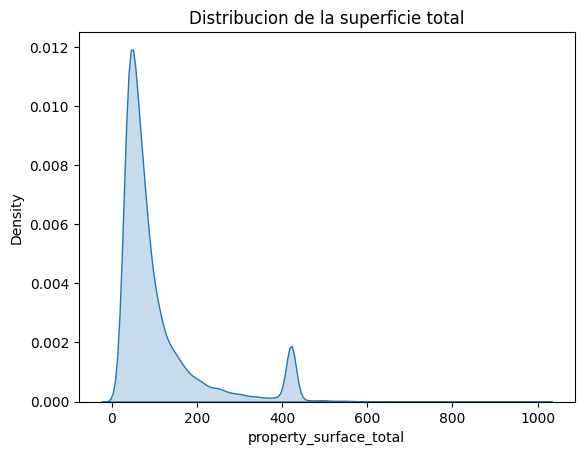

In [ ]:
sns.kdeplot(x=df_train["property_surface_total"], fill=True)
plt.title("Distribucion de la superficie total")
plt.show()

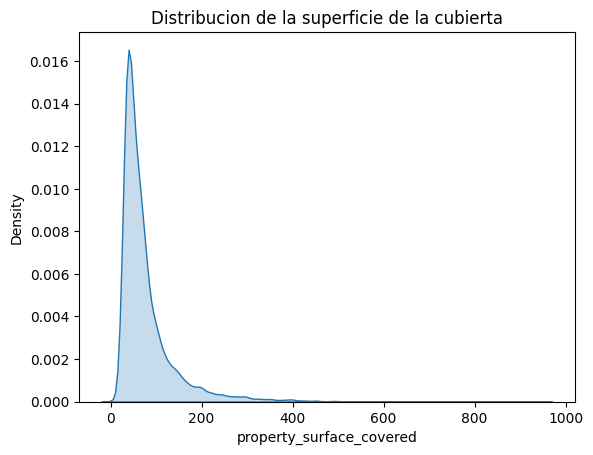

In [ ]:
sns.kdeplot(x=df_train["property_surface_covered"], fill=True)
plt.title("Distribucion de la superficie de la cubierta")
plt.show()

In [ ]:
sns.kdeplot(x=df_train["property_rooms"], fill=True)
plt.title("Distribucion de la cantidad de ambientes")
plt.show()

In [ ]:
sns.kdeplot(x=df_train["property_bedrooms"], fill=True)
plt.title("Distribucion de la cantidad de habitaciones")
plt.show()

Eliminar Observaciones del data frame de entrenamiento de precios

In [ ]:
index_train= df_train.index
price_train=price_train.loc[index_train]

Analizar los precios de venta con las superficie total del dataset

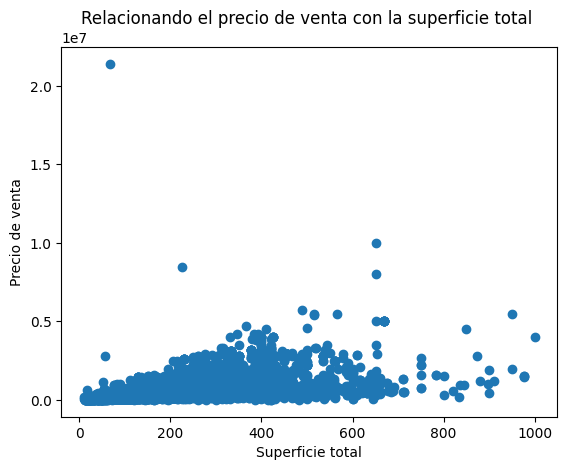

In [ ]:
plt.scatter(df_train['property_surface_total'], price_train)
# Personaliza el gráfico
plt.xlabel('Superficie total')
plt.ylabel('Precio de venta')
plt.title('Relacionando el precio de venta con la superficie total ')
plt.show()

In [ ]:
price_train.max()

21400000.0

vemos que la mayoria de anuncios se ubican por abajo de 5 millones de dolares, pero hay algunos anuncios atipicos que tienen su precio de ventas mayor a 5 millones de dolares. Observemos y analisemos dichos anuncios.

In [ ]:
serie_precio_elevado = price_train > 5000000
serie_precio_elevado

42281     False
63945     False
420757    False
93305     False
268529    False
          ...  
449859    False
203156    False
445146    False
332847    False
35541     False
Name: property_price, Length: 63312, dtype: bool

In [ ]:
df_precios_elevados = df_train[serie_precio_elevado]
df_precios_elevados.head(df_precios_elevados.shape[0])

latitud   longitud  property_rooms  property_bedrooms  \
332190 -34.593634 -58.377164             3.0                8.0   
148534 -34.565947 -58.442326             9.0                5.0   
413786 -34.225851 -59.553991             8.0                6.0   
156777 -34.608300 -58.371200             3.0                2.0   
210907 -34.577966 -58.401880            10.0                5.0   
60073  -34.616044 -58.458621             3.0                2.0   
241326 -34.552484 -58.439573             6.0                4.0   
243285 -34.225851 -59.553991             8.0                4.0   
45223  -34.586413 -58.388982            10.0                4.0   

        property_surface_total  property_surface_covered  type_casa  \
332190              650.424424                606.714286          1   
148534              650.424424                606.714286          1   
413786              566.000000                473.000000          0   
156777              225.000000                 93.000000          1   
210907              950.000000                900.000000          1   
60073                68.000000                 64.000000          0   
241326              516.000000                456.000000          0   
243285              516.000000                456.000000          0   
45223               490.000000                490.000000          0   

        type_dpto  barrio_Palermo  barrio_Belgano  barrio_Recoleta  \
332190          0               0               0                0   
148534          0               0               0                0   
413786          1               0               0                0   
156777          0               0               0                0   
210907          0               1               0                0   
60073           1               0               0                0   
241326          1               0               0                0   
243285          1               0               0                0   
45223           1               0               0                1   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
332190                 0                     0               0   
148534                 0                     0               0   
413786                 0                     0               0   
156777                 0                     0               0   
210907                 0                     0               0   
60073                  1                     0               0   
241326                 0                     0               0   
243285                 0                     0               0   
45223                  0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
332190             5.594263          0.125002                  0.969995   
148534             2.791479          4.351567                  1.527169   
413786             3.725740          3.647140                  0.410021   
156777            -0.011305          0.125002                  0.091769   
210907             2.791479          5.055995                  0.768404   
60073             -0.011305          0.125002                 -0.054757   
241326             1.857218          2.238284                  0.363357   
243285             1.857218          3.647140                  0.363357   
45223              1.857218          5.055995                  0.339091   

        z_property_surface_covered  
332190                    1.277753  
148534                    1.556172  
413786                    0.264230  
156777                   -0.116342  
210907                    0.691872  
60073                    -0.145386  
241326                    0.247204  
243285                    0.247204  
45223                     0.281255

Vemos que hay un anuncio con un precio por mayor a 5000000 dolares y tiene solamente 68 metros cuadrados de superficie. Por ende no tiene mucho sentido esta caracteristicas para el anuncio. Para que no haga un ruido en el dataset  lo que es imputar dicho dato por la media.

Los demas anuncios como tienen una superficie considerable puede tener sentido tomar en cuenta esos anuncios para el analisis final el problema.

In [ ]:
index_precios_a_imputar = df_precios_elevados[df_precios_elevados['property_surface_total'] < 100].index
price_train.loc[index_precios_a_imputar] = price_train.mean()

Eliminar Observaciones del data frame de entrenamiento de precios

In [ ]:
index_train= df_train.index
price_train=price_train.loc[index_train]

Comparamos el grafico despues de la imputacion.

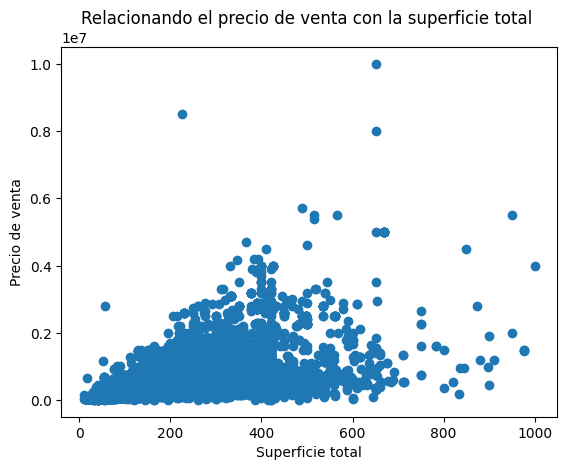

In [ ]:
plt.scatter(df_train['property_surface_total'], price_train)
# Personaliza el gráfico
plt.xlabel('Superficie total')
plt.ylabel('Precio de venta')
plt.title('Relacionando el precio de venta con la superficie total ')
plt.show()

Eliminar las columnas que contienen el valor de Z-score ya que no nos aportara mas informacion al analisis.

In [ ]:
columnas_z_eliminar = ['z_property_bedrooms', 'z_property_rooms', 'z_property_surface_total', 'z_property_surface_covered']
df_train.drop(columnas_z_eliminar, axis="columns", inplace=True)
df_train.columns

Index(['latitud', 'longitud', 'property_rooms', 'property_bedrooms',
       'property_surface_total', 'property_surface_covered', 'type_casa',
       'type_dpto', 'barrio_Palermo', 'barrio_Belgano', 'barrio_Recoleta',
       'barrio_Caballito', 'barrio_Villa_Urquiza', 'barrio_Almagro'],
      dtype='object')

#**Correlacion entre variables**

In [ ]:
df_train_num = df_train.select_dtypes(include=['float64'])
matriz_corr = df_train_num.corr()
matriz_corr

latitud  longitud  property_rooms  \
latitud                   1.000000 -0.400384        0.007562   
longitud                 -0.400384  1.000000       -0.007573   
property_rooms            0.007562 -0.007573        1.000000   
property_bedrooms         0.008446 -0.009733        0.808314   
property_surface_total    0.036207 -0.033299        0.531510   
property_surface_covered  0.034630 -0.020440        0.771917   

                          property_bedrooms  property_surface_total  \
latitud                            0.008446                0.036207   
longitud                          -0.009733               -0.033299   
property_rooms                     0.808314                0.531510   
property_bedrooms                  1.000000                0.484367   
property_surface_total             0.484367                1.000000   
property_surface_covered           0.703638                0.663082   

                          property_surface_covered  
latitud                                   0.034630  
longitud                                 -0.020440  
property_rooms                            0.771917  
property_bedrooms                         0.703638  
property_surface_total                    0.663082  
property_surface_covered                  1.000000

In [ ]:
sns.heatmap(df_train_num.corr(),annot=True)

<Axes: >

Observamos algunas correlaciones interensantes entre variables (con un valor cercano a 1 o -1). Por ejemplo entre las variable de la cantiad de ambientes, la cantidad de dormitorios del inmueble, la superficie total y la superficie de la cubierta.

Tambien se puede apreciar un relacion lineal negativa ente la longitud y latitud.

Analizaremos los graficos de distribucion entre las variables con una correlacion cercana a 1 y -1.

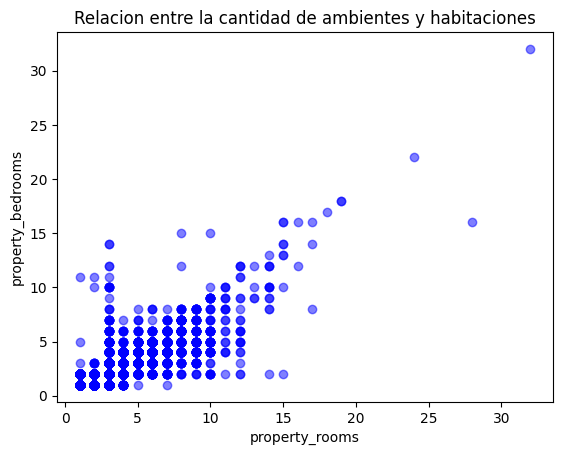

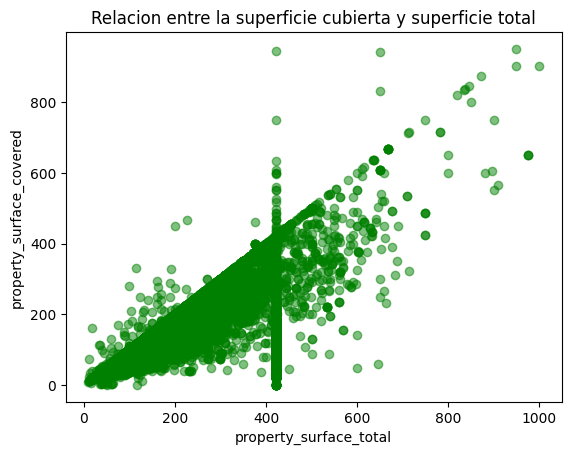

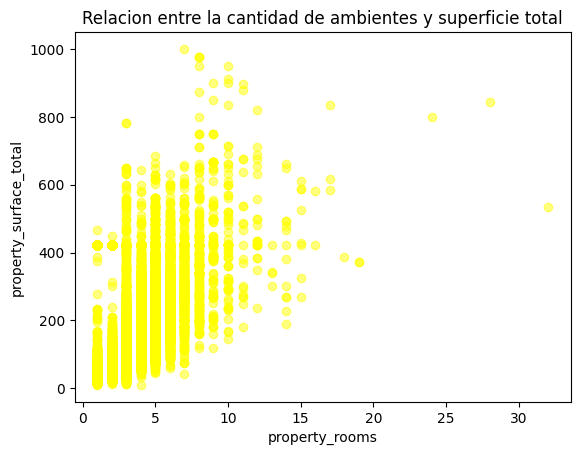

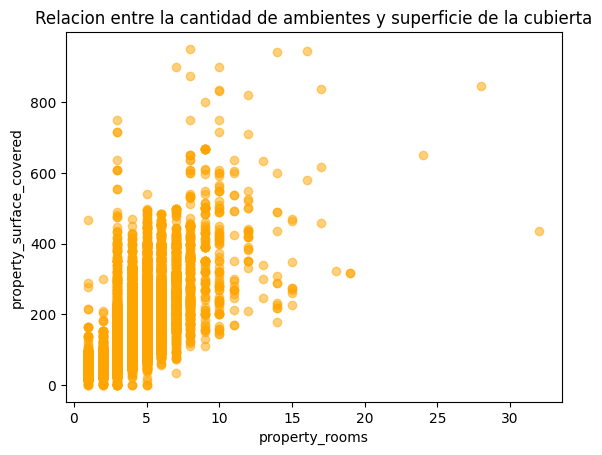

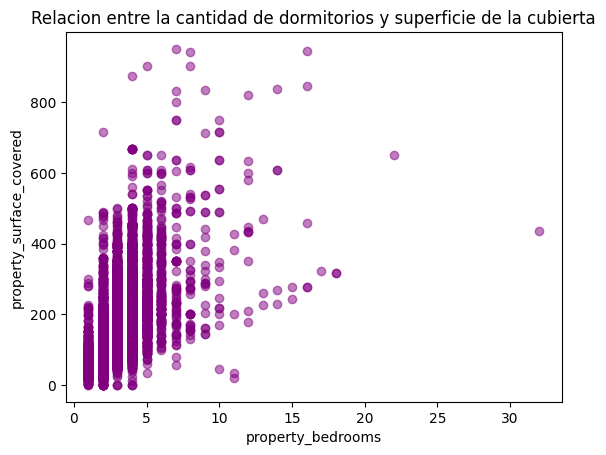

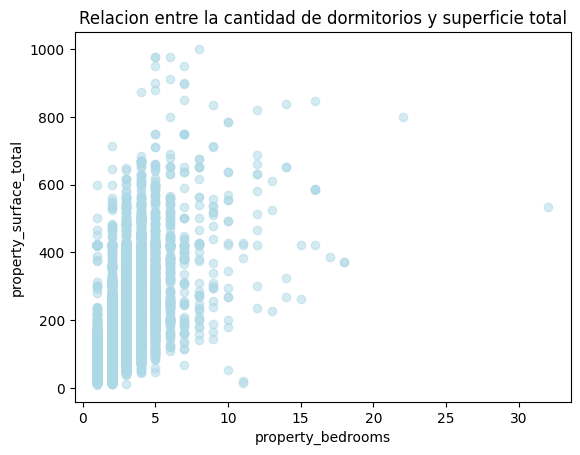

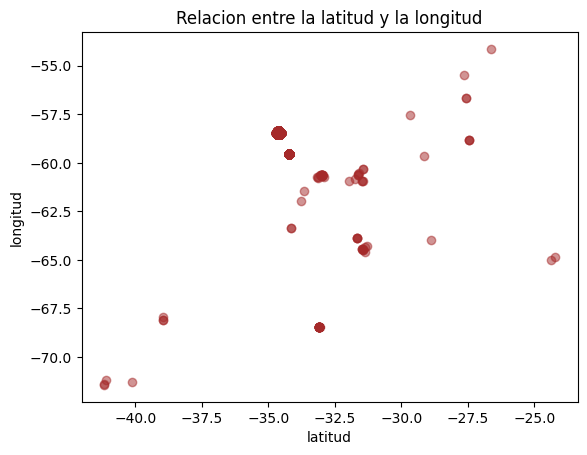

In [ ]:
def graficar_relacion(variable_x, variable_y, color, titulo):
   plt.scatter(df_train[variable_x], df_train[variable_y],label='data', color=color,alpha=0.5)
   plt.xlabel(variable_x)
   plt.ylabel(variable_y)
   plt.title(titulo)
   plt.show()

#Grafico entre dormitorios-ambientes
graficar_relacion('property_rooms', 'property_bedrooms', 'blue', "Relacion entre la cantidad de ambientes y habitaciones")
#Grafico entre superficie cubierta-superficie total
graficar_relacion('property_surface_total', 'property_surface_covered', 'green', "Relacion entre la superficie cubierta y superficie total")
#Grafico entre ambientes-superficie total
graficar_relacion('property_rooms', 'property_surface_total', 'yellow', "Relacion entre la cantidad de ambientes y superficie total")
#Grafico entre ambientes-superficie cubierta
graficar_relacion('property_rooms', 'property_surface_covered', 'orange', "Relacion entre la cantidad de ambientes y superficie de la cubierta")
#Grafico entre dormitorios-superficie cubierta
graficar_relacion('property_bedrooms', 'property_surface_covered', 'purple', "Relacion entre la cantidad de dormitorios y superficie de la cubierta")
#Grafico entre dormitorios-superficie total
graficar_relacion('property_bedrooms', 'property_surface_total', 'lightblue', "Relacion entre la cantidad de dormitorios y superficie total")
#Grafico entre longitud-latitud
graficar_relacion('latitud', 'longitud', 'brown', "Relacion entre la latitud y la longitud")


Notamos que entre la variable de dormitorios y ambientes tienden a tener una relacion lineal, al igual que entre las superficies totales y cubiertas y entre la cubierta con la cantidad de dormitorios y ambientes.

# Agrupamiento

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.metrics import silhouette_score

Este dataset no tiene la eliminación de los outliers debido a la alta modificación en los datos realizados en dicho apartado.

In [80]:
barrios=df_new_train["place_l3"].values
df_new_train["place_l3"]=le.fit_transform(df_new_train["place_l3"])

In [81]:
df_new_train['typ']=df_new_train['type_casa'].apply(lambda x: 1 if x == 1 else 0)
df_new_train['typ']=df_new_train['type_dpto'].apply(lambda x: 2 if x == 1 else x)

Para decidir entre que variables se harán los clusters se hace un resumen de todos

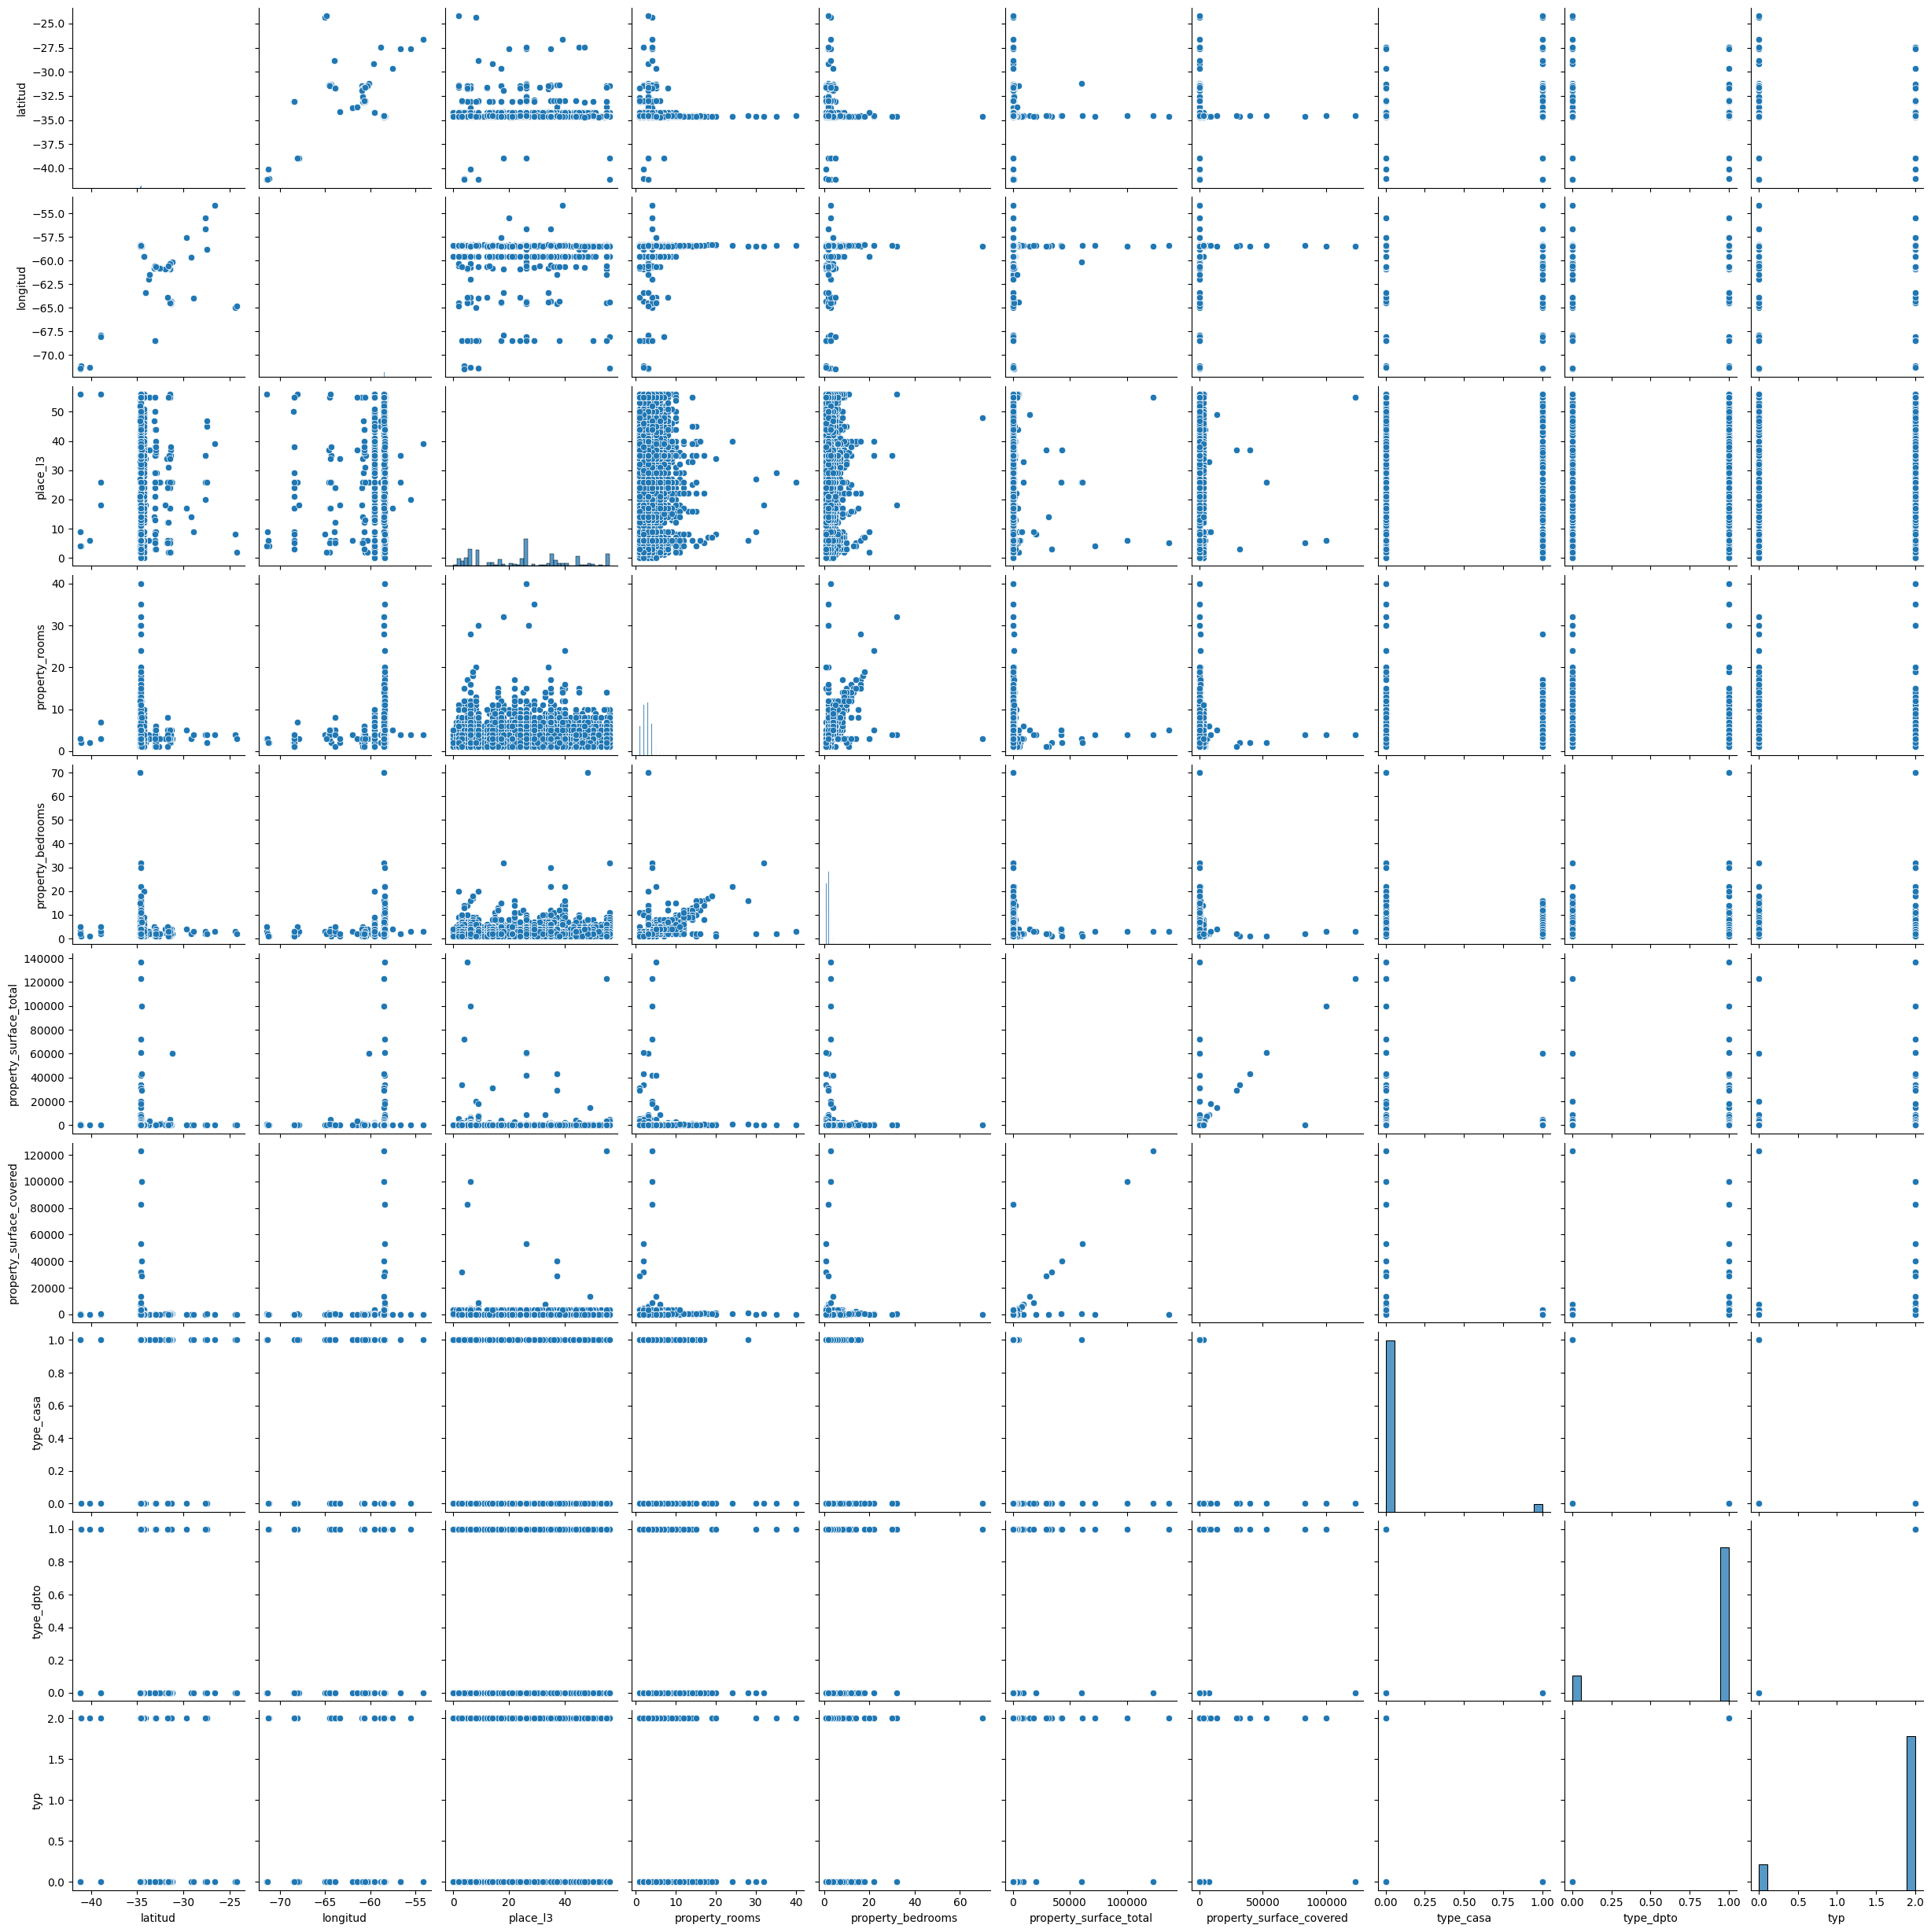

In [82]:
sns.pairplot(df_new_train.select_dtypes(include=['float64', 'int64']))

Para observar la tendencia de clustering del dataset se deciden relizar el análisis de los siguientes conjuntos de variables:
1. longitud-latitud
2. longitud-place_l3
3. latitud-place_l3
4. type - placa_l3
5. property rooms-place_l3
6. property bedroom -place_l3
7. property room -property bedroom
8. property room- property_surce-total
9. type - property_surce-total


---


La elección fue tomada debido a que al obserbar el pair plot son los que más tendencia a agrupamientos parecen presentar

In [160]:
def vector_creator(x,y,df=df_new_train):
    ys=df[y].values
    xs=df[x].values
    vector= [[xs[i], ys[i]] for i in range(len(ys))]
    return vector,xs,ys

In [84]:
def cantidad_clusters(cart, min, max):
    sse = []
    list_k = list(range(min, max))

    for k in list_k:
        km = KMeans(n_clusters=k)
        km.fit(cart)
        sse.append(km.inertia_)

    # Grafico el SSE por K
    plt.figure(figsize=(6, 6))
    plt.plot(list_k, sse, '-o')
    plt.xlabel(r'Cantidad de clusters')
    plt.ylabel('SSE')
    plt.show()
    return

Pensamos en diferentes formas de agrupar las variables en conjuntos.



*   De acuerdo a la longitud y a la latitud podemos observar la cantidad de propiedades esparcidos por toda capital federal






In [89]:
def silhouette_best(cart,min,max,interval):
    last_score=0.0
    max_c=min
    for nk_clusters in range(min,max,interval):
        clusterer = KMeans(n_clusters=nk_clusters)
        preds = clusterer.fit_predict(cart)
        score = silhouette_score (cart, preds)
        print ("For n_clusters =" + str(nk_clusters) + " silhouette score is " + str(score))
        if (score>last_score):
            max_c=nk_clusters
        else:
            break
        last_score=score
    print("Recomended clusters: ",max_c)
    return max_c

In [103]:
def scatter_cluster(cart,x_vector,y_vector,clust):
    kmeans = KMeans(n_clusters=clust)  #Creamos un objeto de la clase KMeans para realizar el agrupamiento
    kmeans.fit(cart) #Entrenamos el algoritmo para que aprenda cómo agrupar
    y_kmeans = kmeans.predict(cart)
    plt.scatter(x_vector, y_vector, c=y_kmeans, s=50, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5,marker='.')
    plt.show()
    return y_kmeans

In [173]:
print("1. Agrupamiento según Latitud y Longitud")
cart, long, lat=vector_creator("longitud","latitud")
cantidad_clusters(cart, 1, 58)
clust=silhouette_best(cart,2,10,1)
y_kmeans= scatter_cluster(cart,long,lat,clust)


Agrupamiento según Latitud y Longitud


For n_clusters =2 silhouette score is 0.9512109923620767
For n_clusters =3 silhouette score is 0.9515739659083089
For n_clusters =4 silhouette score is 0.9518408609219337
For n_clusters =5 silhouette score is 0.9520187323839993
For n_clusters =6 silhouette score is 0.9521798608017511
For n_clusters =7 silhouette score is 0.9521926546651858
For n_clusters =8 silhouette score is 0.9522774909765072
For n_clusters =9 silhouette score is 0.44277954886480075
Recomended clusters:  8


Para tener una idea de como realmente se destribuirían los datos, es decir como son los grupos reales que existen (o sea la distribución por barrios), se decide hacer un gráfico de tipo scatter donde se colorea según el Barrio al cual pertenece cada coordenada.

In [91]:
# Crea el gráfico de dispersión
plt.scatter(df_new_train['latitud'],df_new_train['longitud'],c=df_new_train['place_l3'])

# Personaliza el gráfico
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Barrio')
plt.legend(barrios)

# Muestra el gráfico
plt.show()

In [92]:
sns.scatterplot(x=df_new_train['latitud'],y=df_new_train['longitud'],hue=barrios)

<Axes: xlabel='latitud', ylabel='longitud'>

2. Agrupamiento según Latitud y Barrio


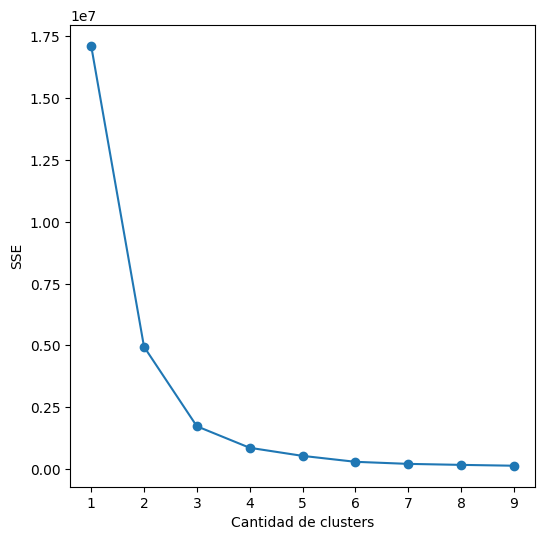

For n_clusters =2 silhouette score is 0.6246828857497307
For n_clusters =3 silhouette score is 0.65287488141079
For n_clusters =4 silhouette score is 0.6826586727483219
For n_clusters =5 silhouette score is 0.6952757366706525
For n_clusters =6 silhouette score is 0.7234820105224874
For n_clusters =7 silhouette score is 0.699931954157384
Recomended clusters:  6


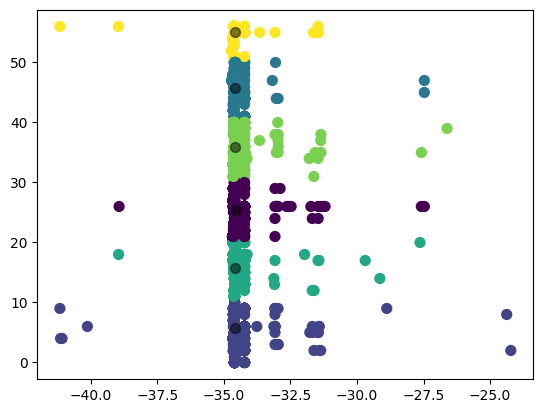

3. Agrupamiento según Longitud y Barrio


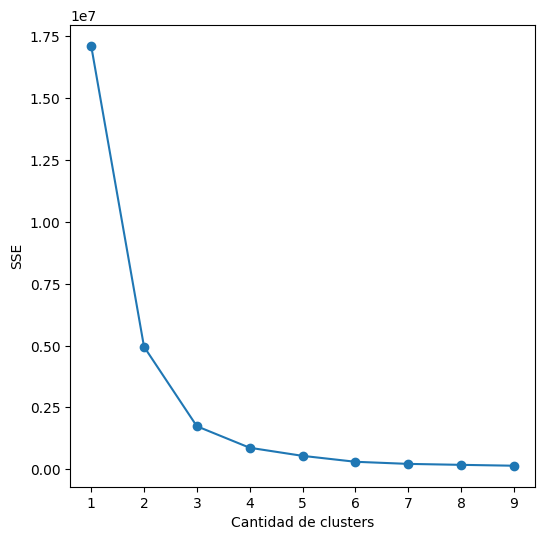

For n_clusters =2 silhouette score is 0.6239179105835457
For n_clusters =3 silhouette score is 0.654753974580378
For n_clusters =4 silhouette score is 0.6803881686426207
For n_clusters =5 silhouette score is 0.6901972447367616
For n_clusters =6 silhouette score is 0.7198617150765887
For n_clusters =7 silhouette score is 0.6943602910347649
Recomended clusters:  6


4. Agrupamiento según tipo de propiedad y Barrio


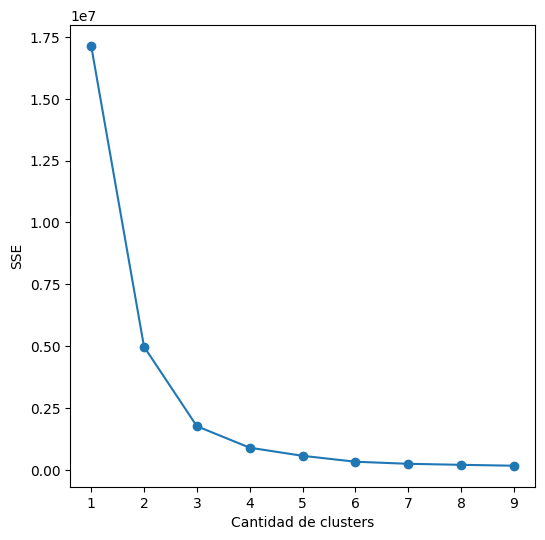

For n_clusters =2 silhouette score is 0.6214109938350042
For n_clusters =3 silhouette score is 0.6466503540276226
For n_clusters =4 silhouette score is 0.6718986769649389
For n_clusters =5 silhouette score is 0.6787957004838038
For n_clusters =6 silhouette score is 0.7026573869043656
For n_clusters =7 silhouette score is 0.6551868039284704
Recomended clusters:  6


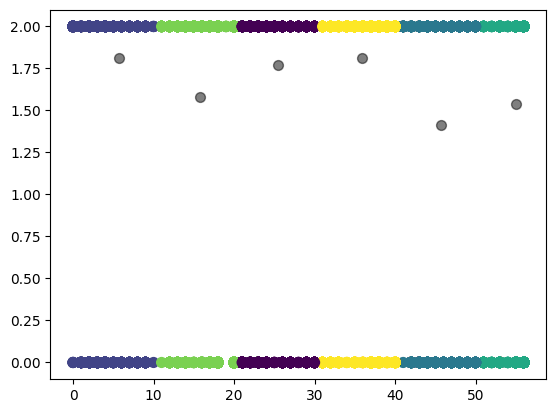

5. Agrupamiento según catidad de ambientes y Barrio


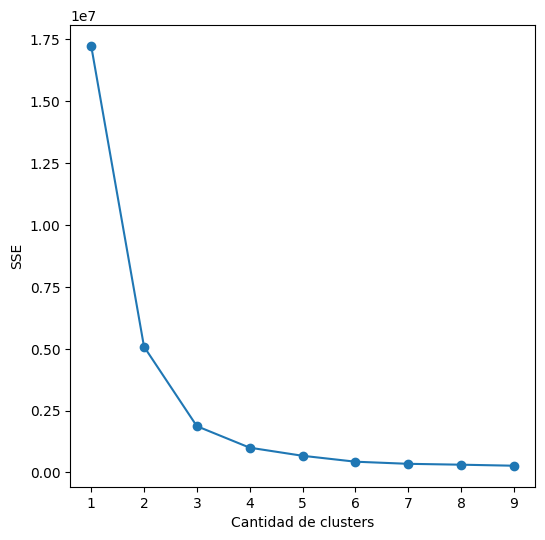

For n_clusters =2 silhouette score is 0.6096608251603436
For n_clusters =3 silhouette score is 0.6307320366267636
For n_clusters =4 silhouette score is 0.636529135663831
For n_clusters =5 silhouette score is 0.6275915780679522
Recomended clusters:  4


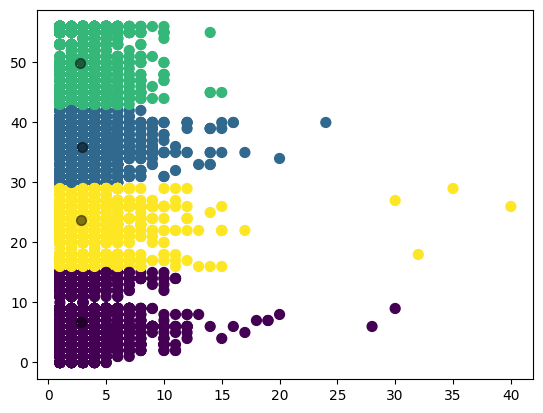

6. Agrupamiento según cantidad de dormitorios y Barrio


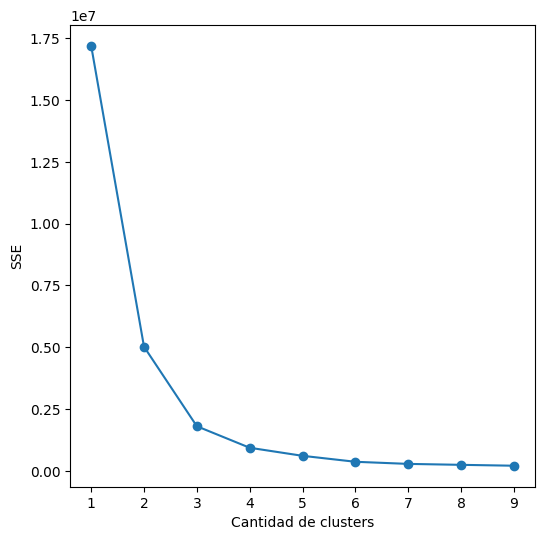

For n_clusters =2 silhouette score is 0.6153122063354182
For n_clusters =3 silhouette score is 0.6369428969242631
For n_clusters =4 silhouette score is 0.6524422086599893
For n_clusters =5 silhouette score is 0.6374578727163778
Recomended clusters:  4


7. Agrupamiento según Ambientes y Dormitorios


In [ ]:
print("2. Agrupamiento según Latitud y Barrio")
vec, lat, barr=vector_creator("latitud","place_l3")
cantidad_clusters(vec, 1, 10)
clust=silhouette_best(vec,2,8,1)
scatter_cluster(vec,lat,barr,clust)

print("3. Agrupamiento según Longitud y Barrio")
vec, long, barr=vector_creator("longitud","place_l3")
cantidad_clusters(vec, 1, 10)
clust=silhouette_best(vec,2,20,1)
scatter_cluster(vec,long,barr,clust)

print("4. Agrupamiento según tipo de propiedad y Barrio")
vec, typ, barr=vector_creator("place_l3","typ")
cantidad_clusters(vec, 1, 10)
clust=silhouette_best(vec,2,20,1)
scatter_cluster(vec,typ,barr,clust)

print("5. Agrupamiento según catidad de ambientes y Barrio")
vec, pr, barr=vector_creator("property_rooms","place_l3")
cantidad_clusters(vec, 1, 10)
clust=silhouette_best(vec,2,20,1)
scatter_cluster(vec,pr,barr,clust)

print("6. Agrupamiento según cantidad de dormitorios y Barrio")
vec, pb, barr=vector_creator("property_bedrooms","place_l3")
cantidad_clusters(vec, 1, 10)
clust=silhouette_best(vec,2,20,1)
scatter_cluster(vec,pb,barr,clust)

print("7. Agrupamiento según Ambientes y Dormitorios")
vec, pr, pb=vector_creator("property_rooms","property_bedrooms")
cantidad_clusters(vec, 1, 20)
clust=silhouette_best(vec,2,20,1)
scatter_cluster(vec,pr,pb,clust)

print("8. Agrupamiento según Ambientes y Supeficie")
vec, pr, pst=vector_creator("property_room","property_surface_total")
cantidad_clusters(vec, 1, 10)
clust=silhouette_best(vec,2,20,1)
scatter_cluster(vec,pr,pst,clust)

print("9. Agrupamiento según Tipo de propiedades y Supeficie")
vec, typ, pst=vector_creator("property_surface_total","typ")
cantidad_clusters(vec, 1, 10)
clust=silhouette_best(vec,2,20,1)
scatter_cluster(vec,typ,pst,clust)

* Los agrupamientos de Latitud/Longitud barrio presentan 6 grupos cada uno. Como en realidad hay 57 barrios diversos debe haber una superpocición entre latitudes y longitudes de las propiedades que pertenecen a dichos barrios, por lo que no se puede confiar en la versosimilidad de dichos datos.
* Los agrupamintos según tipo y barrio presentan una cantidad de grupos diversa a 3 o 57 como consecuencia de las diferentes tendencias en tipo de propiedad en los distintos barrios. Es decir, en barrios como Recoleta, o Palermo hay una mayor tnedencia a departamnetos, mientras que en barrios como Mataderos hay una mayor cantidad de casas.
* Generalmente la cantidad de ambientes y cantidad de dormitorios están estrechamente relacionados al tipo de propiedad, consecuentemente la previa justificación aplica.
* Normalmente, hay una relación lineal positiva entre la cantidad de ambientes y dormitorios, entonces no se espera una fuerte tendencia a agrupamientos.
* Algo similar ocurre para la superficie total y la cantidad de ambientes, ya que se espera que cuanta mayor superficie tenga la propiedad más ambientes posea.
* El análisis hecho sobre conjuntos donde el tipo de propiedad es una variable que en sí presentan 3 grupos, consecuentemente se espera una cantidad de grupos de alrededor de dicho número al creer que propiedades del mismo tipo suelen tener superficies totales más semejantes entre si que con otros tipos de propiedades.



*   Podemos definir si una propiedad su tamanio de acuerdo al tamanio del area habitable, la cantidad de habiaciones y banios.



Dentro del mapa de C.A.B.A.




In [94]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline


In [95]:
df_caba = gpd.read_file("https://raw.githubusercontent.com/claudia-ramos/7506R-1C2024-GRUPO3/main/Datasets/barrios.csv")

WKT            BARRIO  \
0  MULTIPOLYGON (((-58.4528200492791 -34.59598865...         CHACARITA   
1  MULTIPOLYGON (((-58.4655768128541 -34.59655770...          PATERNAL   
2  MULTIPOLYGON (((-58.4237529813037 -34.59782733...      VILLA CRESPO   
3  MULTIPOLYGON (((-58.4946097568899 -34.61486523...  VILLA DEL PARQUE   
4  MULTIPOLYGON (((-58.4128700313088 -34.61411625...           ALMAGRO   

           COMUNA         PERIMETRO                 AREA  OBJETO  \
0  15.00000000000  7724.85295457000  3115707.10626999987  BARRIO   
1  15.00000000000  7087.51329533000  2229829.03362999996  BARRIO   
2  15.00000000000  8131.85707532000  3615977.55634000013  BARRIO   
3  11.00000000000  7705.38979708000  3399595.64148000022  BARRIO   
4   5.00000000000  8537.90136849000  4050752.24524000008  BARRIO   

                                            geometry  
0  MULTIPOLYGON (((-58.45282 -34.59599, -58.45366...  
1  MULTIPOLYGON (((-58.46558 -34.59656, -58.46562...  
2  MULTIPOLYGON (((-58.42375 -34.59783, -58.42495...  
3  MULTIPOLYGON (((-58.49461 -34.61487, -58.49479...  
4  MULTIPOLYGON (((-58.41287 -34.61412, -58.41282...

Mapa

In [169]:
fig, gax = plt.subplots(figsize=(10, 10))
df_caba.plot(ax=gax, edgecolor="black", color="white")
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
plt.show()

Eliminación de datos por fuera de la cuidad de Buenos Aires

In [157]:
bnds=df_caba['geometry'].bounds
minx=min(bnds['minx'])
maxx=max(bnds['maxx'])
miny=min(bnds['miny'])
maxy=max(bnds['maxy'])

In [159]:
df_coor=df_new_train[(df_new_train['latitud']>miny) & (df_new_train['latitud']< maxy) & (df_new_train['longitud']>minx) & (df_new_train['longitud']<maxx)]

Agrupación de los datos filtrados en la cantidad de clusters calculada mediante silhouette. Esto da que la mejor agrupación es con 3 grupos, a diferencia de previo la eliminación de los datos con ubicación por fuera de la delimitación buscada donde se recomendaban 8 grupos

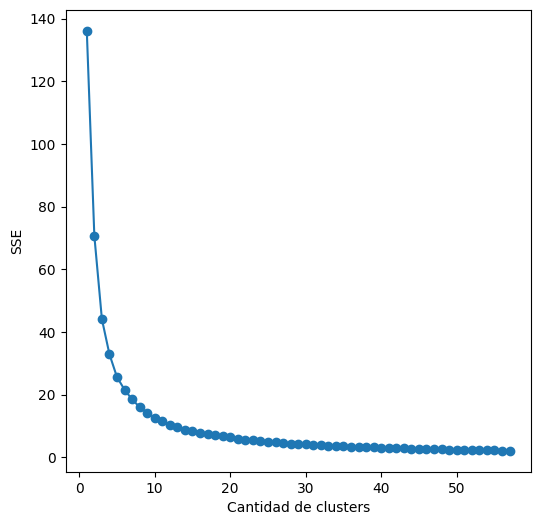

For n_clusters =2 silhouette score is 0.4193871921709695
For n_clusters =3 silhouette score is 0.4571226910618937
For n_clusters =4 silhouette score is 0.3898834573663729
Recomended clusters:  3


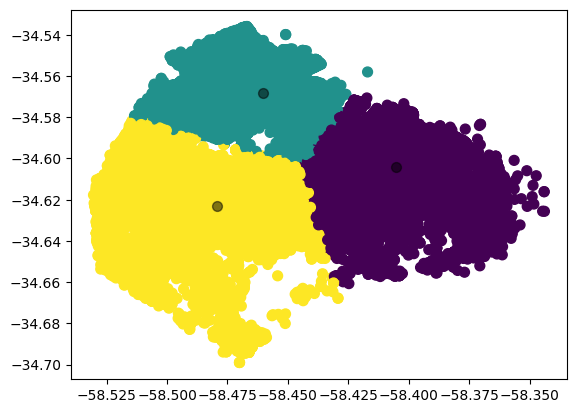

In [171]:
cart, long, lat=vector_creator("longitud","latitud",df_coor)
cantidad_clusters(cart, 1, 58)
clust=silhouette_best(cart,2,10,1)
y_kmeans= scatter_cluster(cart,long,lat,clust)

In [172]:
fig, gax = plt.subplots(figsize=(30, 30))
df_caba.plot(ax=gax, edgecolor="black", color="white")
gax.scatter(long, lat, c=y_kmeans)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
plt.show()

In [176]:
cart, long, lat=vector_creator("longitud","latitud",df_coor)
y_kmeans= scatter_cluster(cart,long,lat,8)

In [177]:
fig, gax = plt.subplots(figsize=(30, 30))
df_caba.plot(ax=gax, edgecolor="black", color="white")
gax.scatter(long, lat, c=y_kmeans)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
plt.show()

Vale aclarar que si se toman las coordenads como válidas entonces habría que hacer un nuevo filtrado donde se eliminan todos aquellas propiedades que quedarían por fuera del area delimitada de Ciudad de Buenos Aires